# **Data Cleaning**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/NEAR_token_transaction_data.xlsx')

In [ ]:
data.head()

Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  18909149     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To    Quantity           Method  
0  0x776a0725094cbf984e31b43d17e8aaec3c88294a   36.593837  Sell To Uniswap  
1  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  104.984275       0x415565b0  
2  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.079035       0x415565b0  
3  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  104.984275       0x415565b0  
4  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   10.247435       0x415565b0

In [ ]:
# Get the total number of columns in the DataFrame
num_columns = len(data.columns)

# Ensure we don't go beyond the available columns
valid_indices = [i for i in range(13, 24) if i < num_columns]

# Drop only the empty columns within the valid index range
empty_columns = [data.columns[i] for i in valid_indices if data.iloc[:, i].isna().all()]
data = data.drop(columns=empty_columns)

# Display the updated DataFrame
data.head()


Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  18909149     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To    Quantity           Method  
0  0x776a0725094cbf984e31b43d17e8aaec3c88294a   36.593837  Sell To Uniswap  
1  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  104.984275       0x415565b0  
2  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.079035       0x415565b0  
3  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  104.984275       0x415565b0  
4  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   10.247435       0x415565b0

In [ ]:
print("Shape of the dataset: ",data.shape)
print("Columns present in the dataset: \n", data.columns, "\n")
print("Column types: \n", data.dtypes)



Shape of the dataset:  (19836, 8)
Columns present in the dataset: 
 Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object') 

Column types: 
 Transaction Hash            object
Blockno                      int64
UnixTimestamp                int64
DateTime (UTC)      datetime64[ns]
From                        object
To                          object
Quantity                   float64
Method                      object
dtype: object


In [ ]:
data.describe()

Blockno  UnixTimestamp                 DateTime (UTC)  \
count  1.983600e+04   1.983600e+04                          19836   
mean   1.968441e+07   1.713463e+09  2024-04-18 17:49:02.953417984   
min    1.890902e+07   1.704069e+09            2024-01-01 00:25:35   
25%    1.946597e+07   1.710817e+09            2024-03-19 02:58:35   
50%    1.973666e+07   1.714100e+09            2024-04-26 02:48:23   
75%    1.993754e+07   1.716527e+09            2024-05-24 05:06:35   
max    2.017186e+07   1.719357e+09            2024-06-25 23:04:35   
std    3.220605e+05   3.898956e+06                            NaN   

            Quantity  
count   19836.000000  
mean      377.944387  
min         0.000000  
25%         3.213580  
50%        72.444861  
75%       293.678666  
max    750000.000000  
std      8007.345063

In [ ]:
# Amount column is renamed as quantity
data.rename(columns={'Amount': 'Quantity'}, inplace=True)

# Convert datetime into datetime format
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])
data.dtypes

Transaction Hash            object
Blockno                      int64
UnixTimestamp                int64
DateTime (UTC)      datetime64[ns]
From                        object
To                          object
Quantity                   float64
Method                      object
dtype: object

In [ ]:
# Check for null values
data.isnull().sum()

Transaction Hash    0
Blockno             0
UnixTimestamp       0
DateTime (UTC)      0
From                0
To                  0
Quantity            0
Method              0
dtype: int64

In [ ]:
# Look for duplicate hashes
data['Transaction Hash'].value_counts()

Transaction Hash
0x630d72d417c6da379ffc6acf3688fcce84792e4a93d6fea8e1ce70ee202088f3    15
0x0d9678769f1943a9f81c7e50f690bfbd797bdfe1624dc94d8a15f513c91f75f0    12
0x705092688310291813c1057081c022dfdb54825a408bece4e773d591f288cf36    11
0xbff846f99284bed5bdac6a318c0ee2ef5da22a9c321aa8b7f44c4a02431fdf24    11
0x377e726d31cf8e60584cea5b9fb79720ff3dff87ae4413afcb5c8f17269f72b0    11
                                                                      ..
0x5d712a4cad451b5826e5952d4eec8be34b65bf201c02e3e8fcbbd877caa7ddb4     1
0x1937aaea921b1b8f74ab69c9b14006aa0c50e6d89cea649d81f74a4ad20ba9a2     1
0x7c3d6c737193b7dd1473aeb59e5a89f3ea367a04a4b22ea939738e3bb369cd07     1
0x76ea380c6b373829cea031c4bd5d34948beabb7903307e9eb257bd8f9763c54d     1
0x27797428fc8aaf088cc707c8788b5d13580696418c79190eda04823ab70d7eb7     1
Name: count, Length: 9787, dtype: int64

In [ ]:
data.describe()

Blockno  UnixTimestamp                 DateTime (UTC)  \
count  1.983600e+04   1.983600e+04                          19836   
mean   1.968441e+07   1.713463e+09  2024-04-18 17:49:02.953417984   
min    1.890902e+07   1.704069e+09            2024-01-01 00:25:35   
25%    1.946597e+07   1.710817e+09            2024-03-19 02:58:35   
50%    1.973666e+07   1.714100e+09            2024-04-26 02:48:23   
75%    1.993754e+07   1.716527e+09            2024-05-24 05:06:35   
max    2.017186e+07   1.719357e+09            2024-06-25 23:04:35   
std    3.220605e+05   3.898956e+06                            NaN   

            Quantity  
count   19836.000000  
mean      377.944387  
min         0.000000  
25%         3.213580  
50%        72.444861  
75%       293.678666  
max    750000.000000  
std      8007.345063

In [ ]:
# How many Transaction Hash are there?
data['Transaction Hash'].value_counts()

Transaction Hash
0x630d72d417c6da379ffc6acf3688fcce84792e4a93d6fea8e1ce70ee202088f3    15
0x0d9678769f1943a9f81c7e50f690bfbd797bdfe1624dc94d8a15f513c91f75f0    12
0x705092688310291813c1057081c022dfdb54825a408bece4e773d591f288cf36    11
0xbff846f99284bed5bdac6a318c0ee2ef5da22a9c321aa8b7f44c4a02431fdf24    11
0x377e726d31cf8e60584cea5b9fb79720ff3dff87ae4413afcb5c8f17269f72b0    11
                                                                      ..
0x5d712a4cad451b5826e5952d4eec8be34b65bf201c02e3e8fcbbd877caa7ddb4     1
0x1937aaea921b1b8f74ab69c9b14006aa0c50e6d89cea649d81f74a4ad20ba9a2     1
0x7c3d6c737193b7dd1473aeb59e5a89f3ea367a04a4b22ea939738e3bb369cd07     1
0x76ea380c6b373829cea031c4bd5d34948beabb7903307e9eb257bd8f9763c54d     1
0x27797428fc8aaf088cc707c8788b5d13580696418c79190eda04823ab70d7eb7     1
Name: count, Length: 9787, dtype: int64

In [ ]:
# How many Method are there?
data['Method'].value_counts()

Method
Swap                         9432
0x415565b0                   3281
-                            2563
Execute                      1030
Sell To Uniswap               760
                             ... 
Withdraw                        1
Buy On Uniswap V2Fork           1
Fill Order                      1
Sell Shares                     1
Swap Exact Tokens For ETH       1
Name: count, Length: 88, dtype: int64

In [ ]:
# How many unique UnixTimestamp	 are there?
data['UnixTimestamp'].value_counts()

UnixTimestamp
1714820291    21
1711484987    18
1711485059    16
1709981891    13
1710048347    13
              ..
1716015851     1
1716016511     1
1716016823     1
1716017039     1
1704068735     1
Name: count, Length: 8427, dtype: int64

In [ ]:
 # Correlation matrix by Selecting only numerical columns
correlation_matrix = data.select_dtypes(include=['number']).corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                 Blockno  UnixTimestamp  Quantity
Blockno        1.000000       0.999999  0.005760
UnixTimestamp  0.999999       1.000000  0.005759
Quantity       0.005760       0.005759  1.000000


In [ ]:
from google.colab import files

# Save the cleaned DataFrame to a CSV file
cleaned_file_path = 'Pre_processed_ERC20_token_transaction.csv'
data.to_csv(cleaned_file_path, index=False)

# Download the CSV file to your local system
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploratory Data Analysis (EDA)**

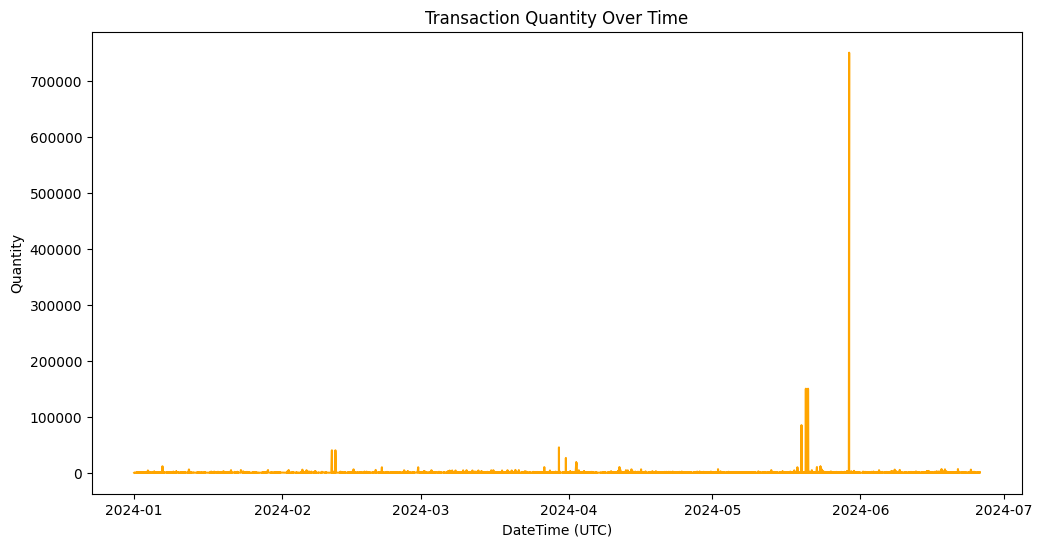

In [ ]:
# Analyzing how transaction quantities vary over time

data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])  # Ensure DateTime is in datetime format
data.sort_values(by='DateTime (UTC)', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['DateTime (UTC)'], data['Quantity'], color='orange')
plt.title('Transaction Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()

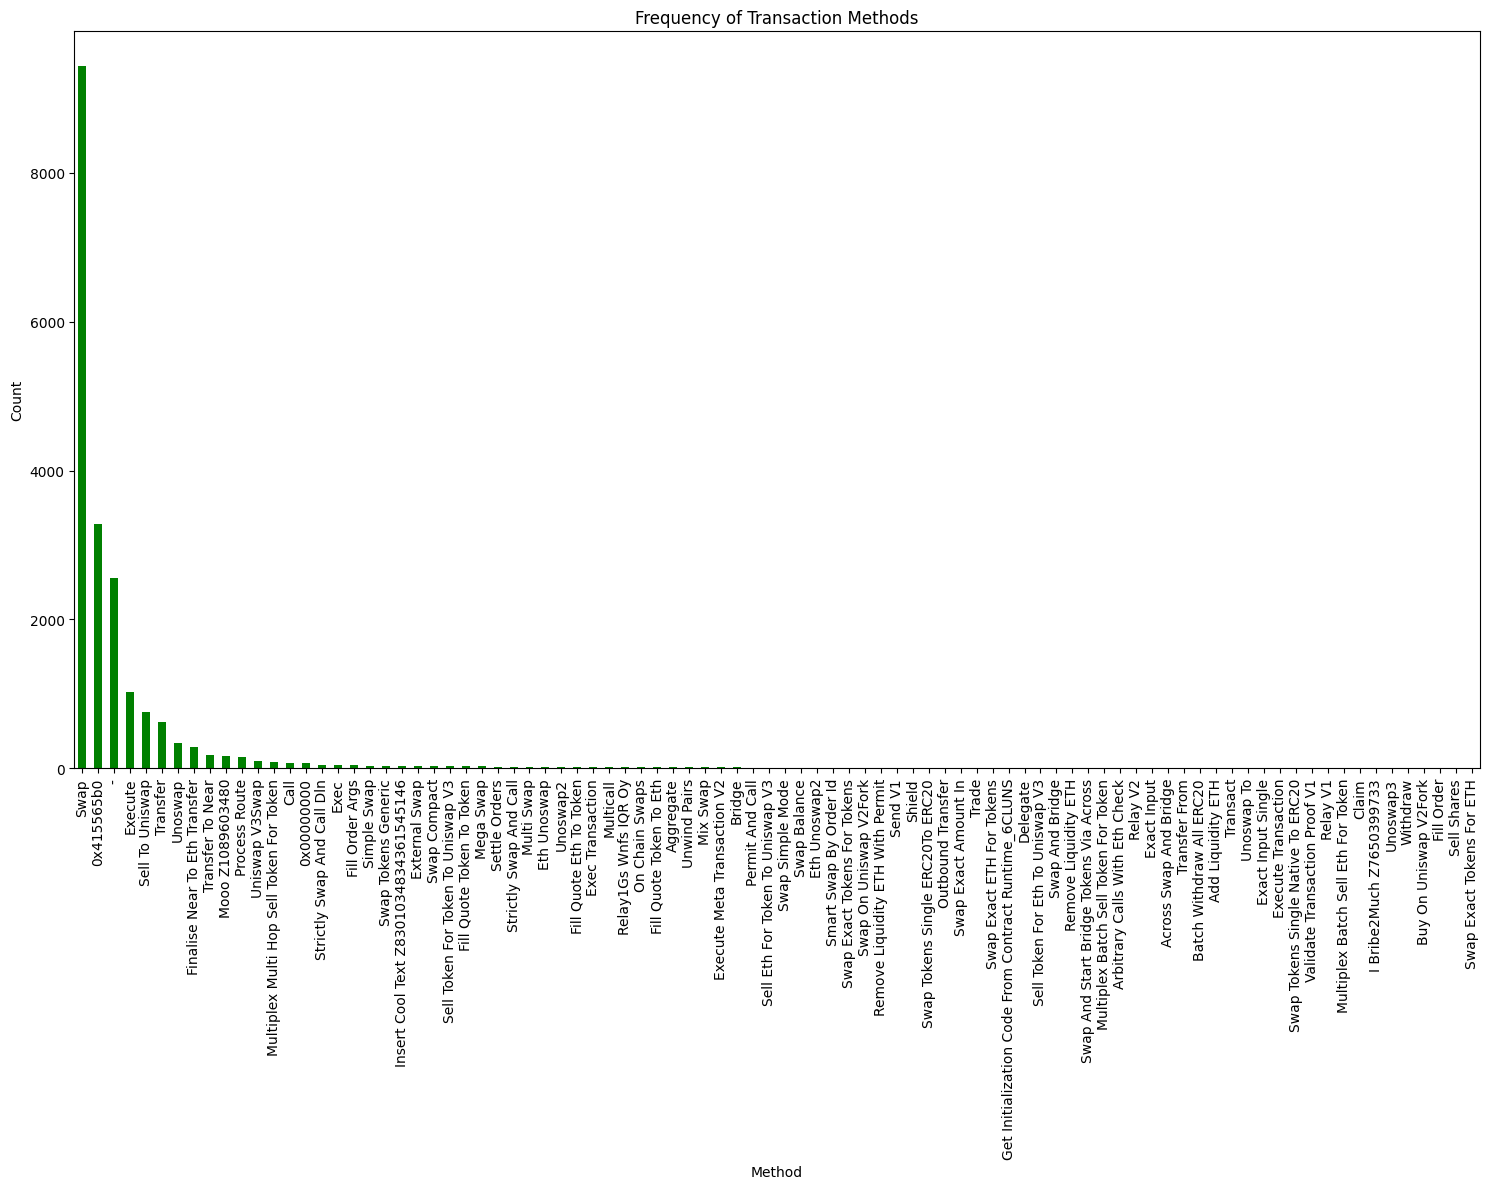

In [ ]:
# Display the frequency of different transaction methods.
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
method_counts = data['Method'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(15, 12))  # Adjust the figure size
method_counts.plot(kind='bar', color='green')
plt.title('Frequency of Transaction Methods')
plt.xlabel('Method')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

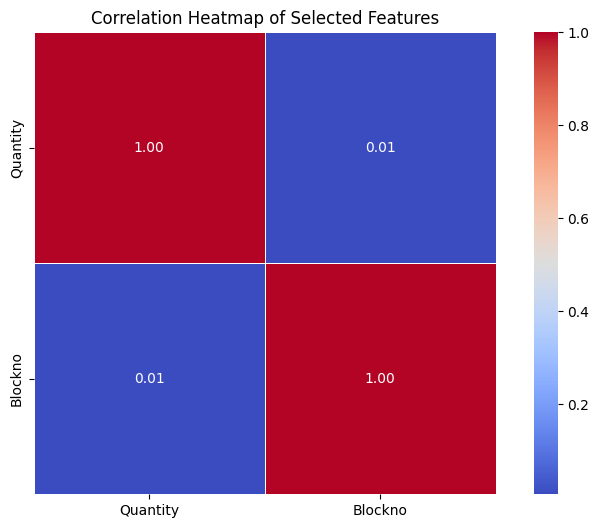

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Select the numeric columns (Quantity, Value)
selected_columns = ['Quantity', 'Blockno']

# Ensure that all selected columns are numeric
for col in selected_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values (if any were introduced by coercion)
cleaned_data_for_visualization = data[selected_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = cleaned_data_for_visualization.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


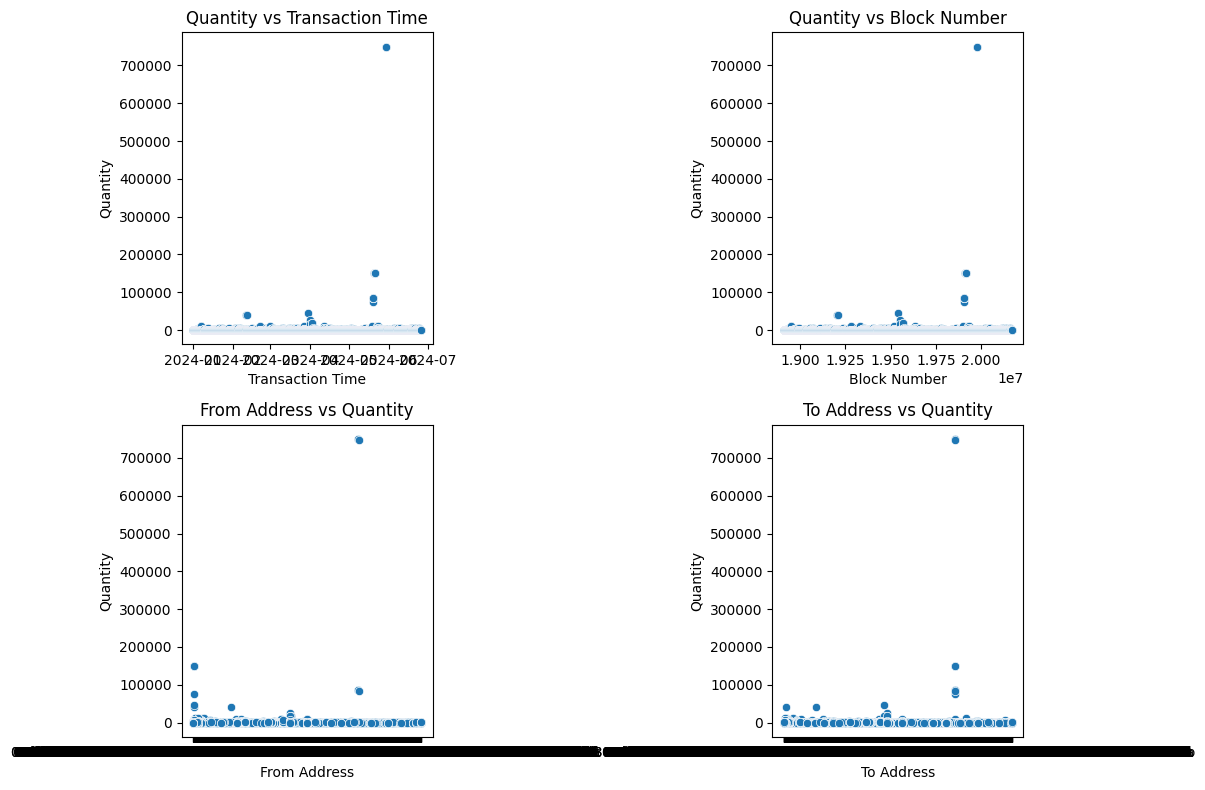

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot: Quantity vs Transaction Time
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='DateTime (UTC)', y='Quantity', data=data)
plt.title('Quantity vs Transaction Time')
plt.xlabel('Transaction Time')
plt.ylabel('Quantity')

# Scatterplot: Quantity vs Block Number
plt.subplot(2, 2, 2)
sns.scatterplot(x='Blockno', y='Quantity', data=data)
plt.title('Quantity vs Block Number')
plt.xlabel('Block Number')
plt.ylabel('Quantity')

# Scatterplot: From Address vs Quantity
plt.subplot(2, 2, 3)
sns.scatterplot(x='From', y='Quantity', data=data)
plt.title('From Address vs Quantity')
plt.xlabel('From Address')
plt.ylabel('Quantity')

# Scatterplot: To Address vs Quantity
plt.subplot(2, 2, 4)
sns.scatterplot(x='To', y='Quantity', data=data)
plt.title('To Address vs Quantity')
plt.xlabel('To Address')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()


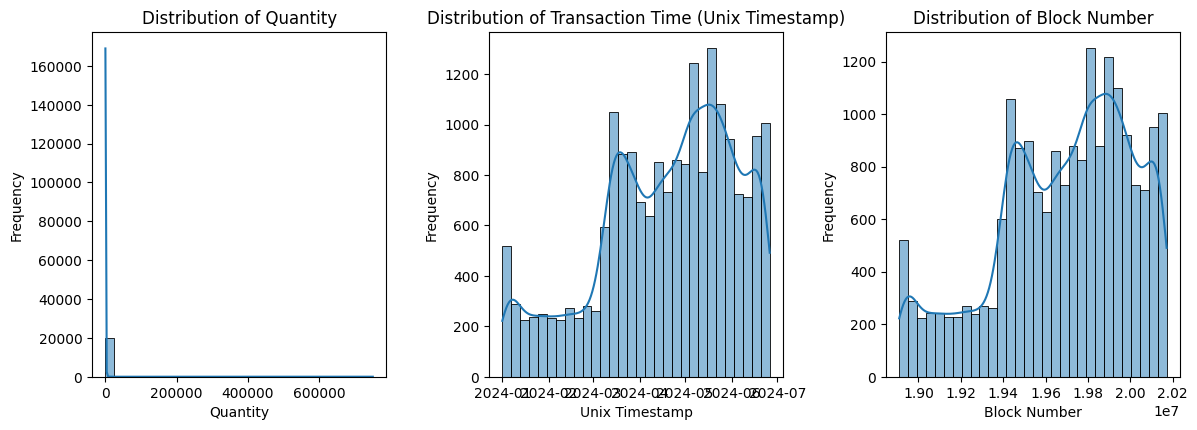

In [ ]:
# Histogram

plt.figure(figsize=(12, 8))

# Histogram: Quantity
plt.subplot(2, 3, 1)
sns.histplot(data['Quantity'], kde=True, bins=30)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Histogram: Transaction Time
plt.subplot(2, 3, 2)
sns.histplot(data['DateTime (UTC)'], kde=True, bins=30)
plt.title('Distribution of Transaction Time (Unix Timestamp)')
plt.xlabel('Unix Timestamp')
plt.ylabel('Frequency')

# Histogram: Block Number
plt.subplot(2, 3, 3)
sns.histplot(data['Blockno'], kde=True, bins=30)
plt.title('Distribution of Block Number')
plt.xlabel('Block Number')
plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


# **Local Outlier Factor (LOF)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import networkx as nx  # Import networkx

# Task 1: Clean and preprocess the dataset
# Scale numerical features and encode categorical variables

def preprocess_data(data):
    # Select numerical features
    numerical_features = ['Quantity','Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Blockno']
    scaler = MinMaxScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    # Select categorical features
    categorical_features = ['From', 'To', 'Method']
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_categories = encoder.fit_transform(data[categorical_features])
    encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_features))

    # Combine numerical and encoded categorical features
    preprocessed_data = pd.concat([data[numerical_features], encoded_df], axis=1)
    return preprocessed_data

In [ ]:
# Task 2: Feature selection and/or creation
def create_features(data):
    # Calculate and add 'Betweenness Centrality' if it's not present
    if not all(col in data.columns for col in ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']):
        # Create a directed graph from the transaction data
        G = nx.DiGraph()
        edges = data[['From', 'To', 'Quantity']].values
        G.add_weighted_edges_from(edges)
        # Compute centrality metrics
        betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
        # Add these features to the original dataset
        data['Betweenness Centrality'] = data['From'].map(betweenness_centrality)
        # Add other centrality metrics if they are not present
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        data['Degree Centrality'] = data['From'].map(degree_centrality)
        data['Closeness Centrality'] = data['From'].map(closeness_centrality)

    # Calculate TransactionFrequency and TransactionAmountRatio
    data['TransactionFrequency'] = data.groupby('From')['Quantity'].transform('count') # Fixed: Use 'Quantity' for count
    data['TransactionAmountRatio'] = data['Quantity'] / data.groupby('From')['Quantity'].transform('sum')
    return data

# Create features before preprocessing
data_with_features = create_features(data)

# Preprocess the data after feature creation
preprocessed_data = preprocess_data(data_with_features)

In [ ]:
from IPython.display import display
# Create features before preprocessing
data_with_features = create_features(data)

# Preprocess the data after feature creation
preprocessed_data = preprocess_data(data_with_features)

# Display the first few rows of the updated data
display(data.head())

Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  0.000000     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  0.000041     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  0.000041     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  0.000041     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  0.000104     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To      Quantity           Method  \
0  0x776a0725094cbf984e31b43d17e8aaec3c88294a  4.879178e-05  Sell To Uniswap   
1  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  1.399790e-04       0x415565b0   
2  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0  1.053794e-07       0x415565b0   
3  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  1.399790e-04       0x415565b0   
4  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  1.366325e-05       0x415565b0   

   Betweenness Centrality  Degree Centrality  Closeness Centrality  \
0                1.000000           1.000000              1.000000   
1                0.051332           0.113936              0.906074   
2                0.051332           0.113936              0.906074   
3                0.450616           0.778719              0.891285   
4                0.051332           0.113936              0.906074   

   TransactionFrequency  TransactionAmountRatio  
0                  2425            1.778927e-04  
1                  3575            1.650612e-04  
2                  3575            1.242619e-07  
3                  1656            3.391440e-04  
4                  3575            1.611150e-05

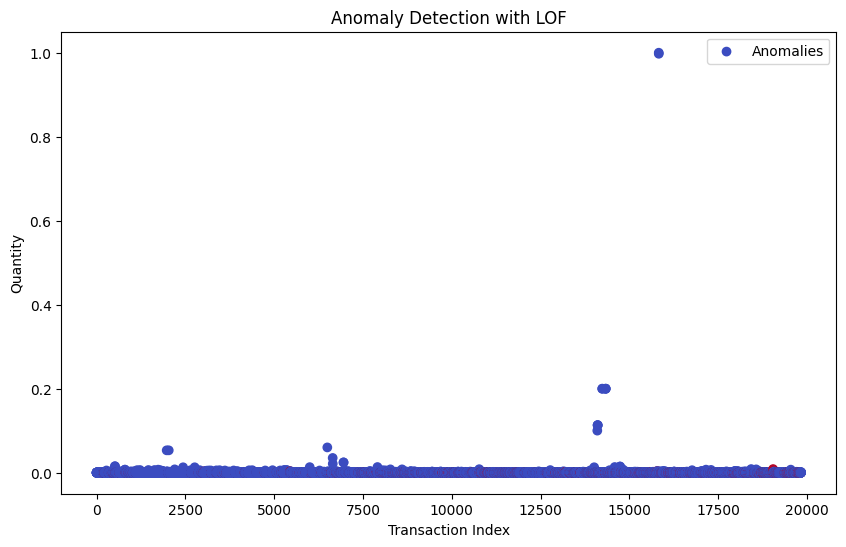

In [ ]:
# Task 3: Initialize and train the Local Outlier Factor (LOF) model
import numpy as np
# Select relevant features for LOF
relevant_features = preprocessed_data.columns
X = preprocessed_data[relevant_features]

# Train the LOF model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
preprocessed_data['AnomalyScore'] = lof_model.fit_predict(X)
preprocessed_data['AnomalyScore'] = np.where(preprocessed_data['AnomalyScore'] == -1, 1, 0)  # 1 for anomaly, 0 for normal
import os

# Before saving the file, create the directory if it doesn't exist:
os.makedirs('/content/data', exist_ok=True)

# Save the results to a CSV file
preprocessed_data.to_csv('/content/data/lof_anomaly_detection_results.csv', index=False)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(preprocessed_data.index, preprocessed_data['Quantity'], c=preprocessed_data['AnomalyScore'], cmap='coolwarm', label='Anomalies')
plt.title('Anomaly Detection with LOF')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.savefig('/content/data/lof_anomaly_detection_visualization.png')
plt.show()

In [ ]:
# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # 10% of data as anomalies
y_pred = lof.fit_predict(X_scaled)

# Add the LOF scores and labels to the dataset
data['LOF_Score'] = lof.negative_outlier_factor_
data['Outlier_Label'] = y_pred  # -1 = anomalous, 1 = normal

# Step 4: Display anomalies
anomalies = data[data['Outlier_Label'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")
anomalies


Number of anomalies detected: 1983


Transaction Hash   Blockno  \
15     0xc6345ad2ad66de57317228d943b8f2cc8bb248f29c2e...  0.002513   
16     0xc6345ad2ad66de57317228d943b8f2cc8bb248f29c2e...  0.002513   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  0.002891   
36     0x95910d734c548e7c25071c772461712be8093bec9014...  0.003452   
46     0xc31ccac2c0d0f978e761d4aaa8e26ab58a460cceeb23...  0.004251   
...                                                  ...       ...   
19779  0x1c98a86dd290182dfffc86d3f714bb3b067cda74a57a...  0.997783   
19796  0x36752947a59371c2e7445d74fc9d69be00b1151dc39e...  0.998517   
19797  0x36752947a59371c2e7445d74fc9d69be00b1151dc39e...  0.998517   
19818  0x4a613ed0b5baae590ca416aa3f280167aa0ccf7b6b12...  0.999624   
19833  0x37dfd226ef55d464641ec94fc675ad3692d9af347132...  1.000000   

       UnixTimestamp      DateTime (UTC)  \
15        1704107327 2024-01-01 11:08:47   
16        1704107327 2024-01-01 11:08:47   
26        1704113195 2024-01-01 12:46:35   
36        1704121787 2024-01-01 15:09:47   
46        1704133967 2024-01-01 18:32:47   
...              ...                 ...   
19779     1719322919 2024-06-25 13:41:59   
19796     1719334067 2024-06-25 16:47:47   
19797     1719334067 2024-06-25 16:47:47   
19818     1719350963 2024-06-25 21:29:23   
19833     1719356675 2024-06-25 23:04:35   

                                             From  \
15     0xbd49e0f383f501001d97358b8e4f8dca788fa41a   
16     0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
36     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
46     0x6469b34a2a4723163c4902dbbdea728d20693c12   
...                                           ...   
19779  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
19796  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19797  0x1111111254eeb25477b68fb85ed929f73a960582   
19818  0x5f515f6c524b18ca30f7783fb58dd4be2e9904ec   
19833  0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5   

                                               To      Quantity  \
15     0x22f9dcf4647084d6c31b2765f6910cd85c178c18  2.659786e-05   
16     0x6469b34a2a4723163c4902dbbdea728d20693c12  2.659786e-05   
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  9.350457e-04   
36     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0  2.229084e-09   
46     0x1c742eed25fdd98588de2263b0914565fb4d7d04  1.336037e-04   
...                                           ...           ...   
19779  0x9d8c87be2e2109817e9a754435a42ad646c69d6b  1.841111e-05   
19796  0x1111111254eeb25477b68fb85ed929f73a960582  2.340943e-05   
19797  0x4a41f0e8560fa6b2d4737bc62db7fd9a250e182a  2.340943e-05   
19818  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  3.781253e-04   
19833  0x28104d4f703ee5b5011cefe106f54efd56f33f95  1.597822e-03   

                Method  Betweenness Centrality  Degree Centrality  \
15          0x415565b0                0.000000           0.000000   
16          0x415565b0                0.450616           0.778719   
26                   -                0.051332           0.113936   
36          0x415565b0                0.051332           0.113936   
46     Sell To Uniswap                1.000000           1.000000   
...                ...                     ...                ...   
19779       0x415565b0                0.450616           0.778719   
19796             Swap                0.305917           0.346516   
19797             Swap                0.179253           0.520716   
19818             Swap                0.000000           0.015066   
19833     Swap Compact                0.000344           0.000942   

       Closeness Centrality  TransactionFrequency  TransactionAmountRatio  \
15                 0.000000                     1            1.000000e+00   
16                 0.891285                  1656            6.444183e-05   
26                 0.906074                  3575            1.102592e-03   
36                 0.906074                  3575            2.628504e-09   
46            

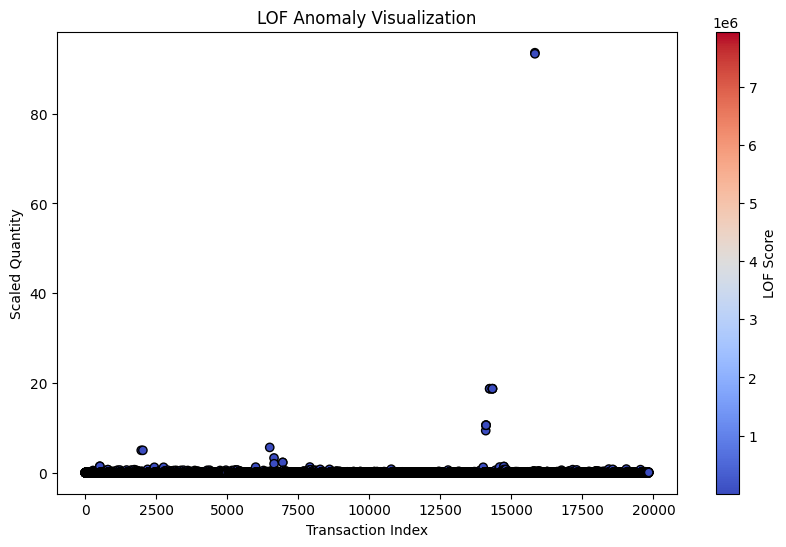

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #Import StandardScaler


# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Calculate LOF scores
lof_model.fit(X_scaled)  # Fit the model to your data before getting outlier scores
lof_scores = -lof_model.negative_outlier_factor_  # Get LOF scores


# Now you can plot - Scatter plot of transaction index vs scaled quantity colored by LOF Score
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=lof_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label="LOF Score")
plt.title("LOF Anomaly Visualization")
plt.xlabel("Transaction Index")
plt.ylabel("Scaled Quantity")
plt.show()

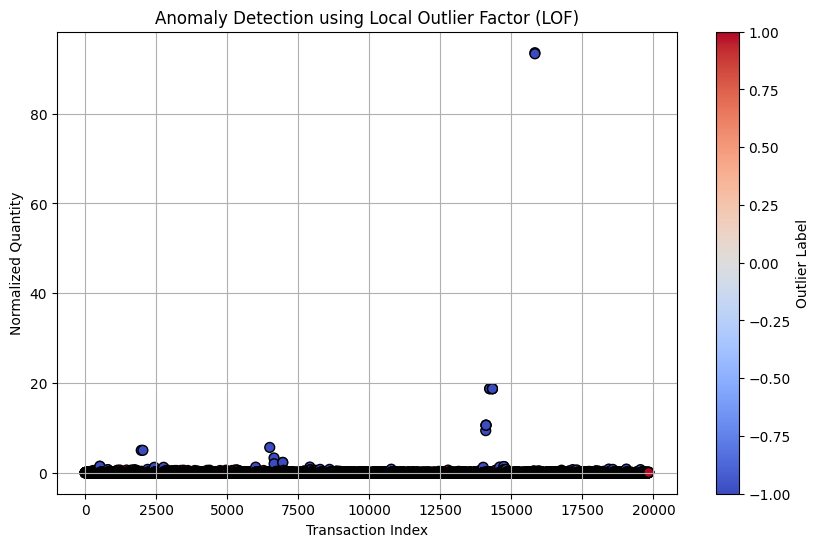

In [ ]:
import matplotlib.pyplot as plt

# Prepare the data for visualization
X['Outlier_Label'] = y_pred  # Add labels for normal (1) and anomalous (-1)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=y_pred, cmap='coolwarm', edgecolor='k', s=50)

# Highlight anomalies
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Transaction Index')
plt.ylabel('Normalized Quantity')
plt.colorbar(label='Outlier Label')
plt.grid(True)
plt.show()


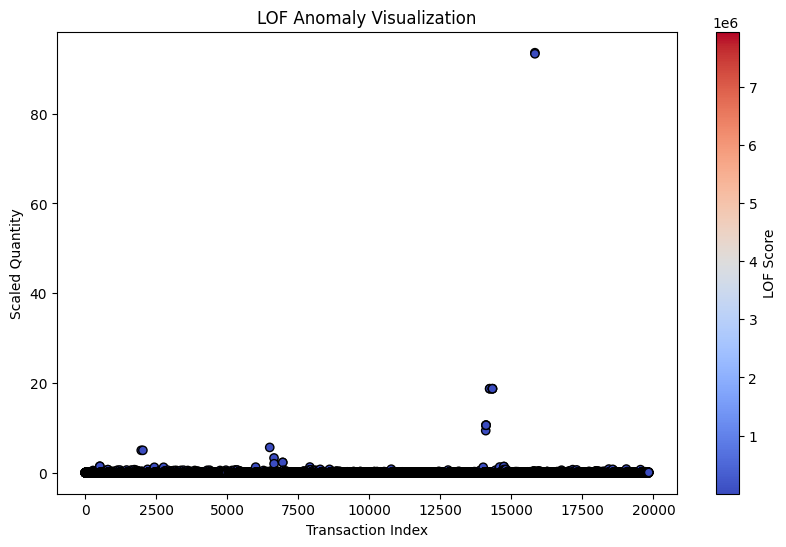

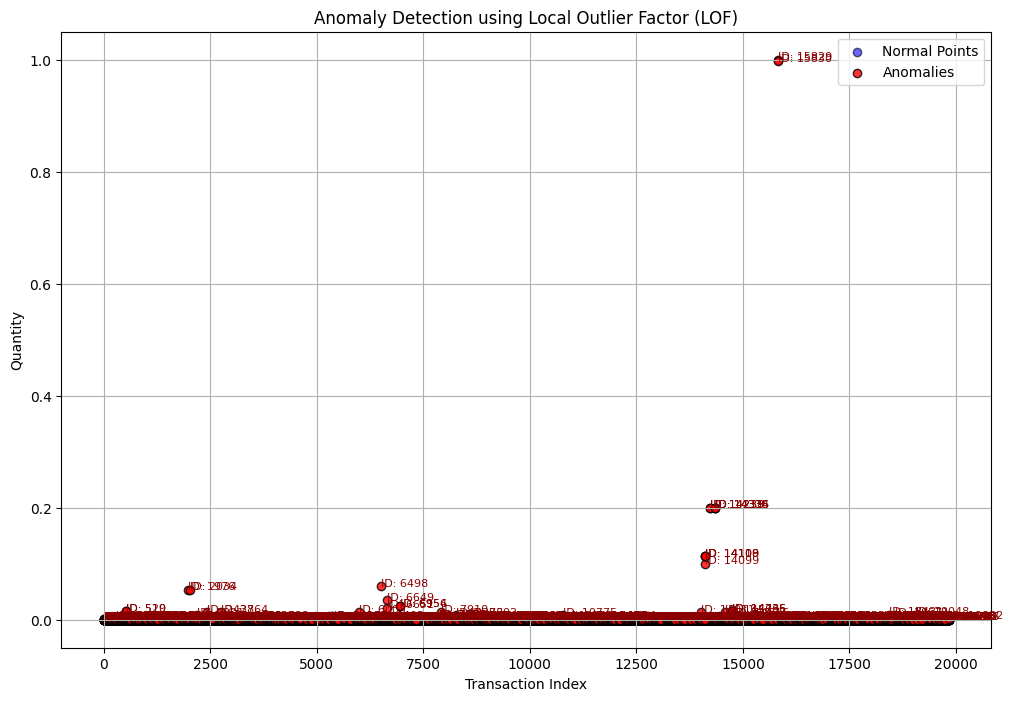

In [ ]:
# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Calculate LOF scores
lof_model.fit(X_scaled)  # Fit the model to your data before getting outlier scores
lof_scores = -lof_model.negative_outlier_factor_  # Get LOF scores

# Add LOF labels to the dataset
y_pred = lof_model.fit_predict(X_scaled)
data['Outlier_Label'] = y_pred  # -1 = anomalous, 1 = normal

# Now you can plot - Scatter plot of transaction index vs scaled quantity colored by LOF Score
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=lof_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label="LOF Score")
plt.title("LOF Anomaly Visualization")
plt.xlabel("Transaction Index")
plt.ylabel("Scaled Quantity")
plt.show()


# Prepare the data for visualization
data['Index'] = range(len(data))  # Add an index column for easy referencing
normal_points = data[data['Outlier_Label'] == 1]
anomalies = data[data['Outlier_Label'] == -1]

# Plot normal points
plt.figure(figsize=(12, 8))
plt.scatter(
    normal_points['Index'],
    normal_points['Quantity'],
    c='blue',
    label='Normal Points',
    alpha=0.6,
    edgecolor='k'
)

# Plot anomalous points
plt.scatter(
    anomalies['Index'],
    anomalies['Quantity'],
    c='red',
    label='Anomalies',
    alpha=0.8,
    edgecolor='k'
)

# Annotate anomalies
for _, row in anomalies.iterrows():
    plt.text(
        row['Index'],
        row['Quantity'],
        f"ID: {int(row['Index'])}",
        fontsize=8,
        color='darkred'
    )

# Add plot details
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

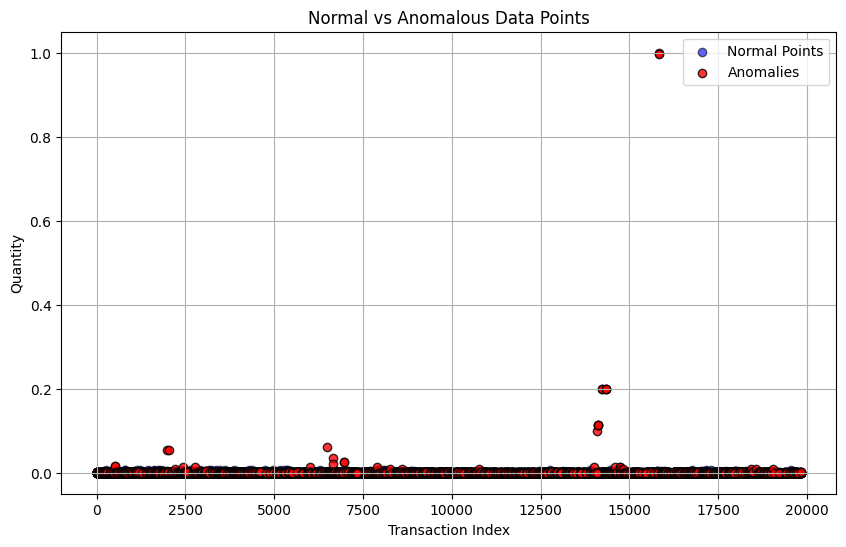

In [ ]:
# Split data into normal and anomalous points
normal_points = data[data['Outlier_Label'] == 1]
anomalies = data[data['Outlier_Label'] == -1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(normal_points.index, normal_points['Quantity'], c='blue', label='Normal Points', alpha=0.6, edgecolor='k')
plt.scatter(anomalies.index, anomalies['Quantity'], c='red', label='Anomalies', alpha=0.8, edgecolor='k')

# Plot details
plt.title('Normal vs Anomalous Data Points')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Count anomalies and normal points
num_anomalies = (data['Outlier_Label'] == -1).sum()
num_normal = (data['Outlier_Label'] == 1).sum()

print(f"Number of anomalies detected: {num_anomalies}")
print(f"Number of normal points: {num_normal}")

# Display top anomalies with the lowest LOF scores
top_anomalies = data[data['Outlier_Label'] == -1].sort_values(by='LOF_Score')
print("Top anomalies based on LOF Score:")
print(top_anomalies[['Quantity', 'LOF_Score']].head())


Number of anomalies detected: 991
Number of normal points: 18845
Top anomalies based on LOF Score:
       Quantity     LOF_Score
423    0.001618 -7.944585e+06
422    0.001618 -7.944585e+06
11704  0.001616 -7.549267e+06
5416   0.001608 -7.017897e+06
473    0.001349 -4.426078e+06


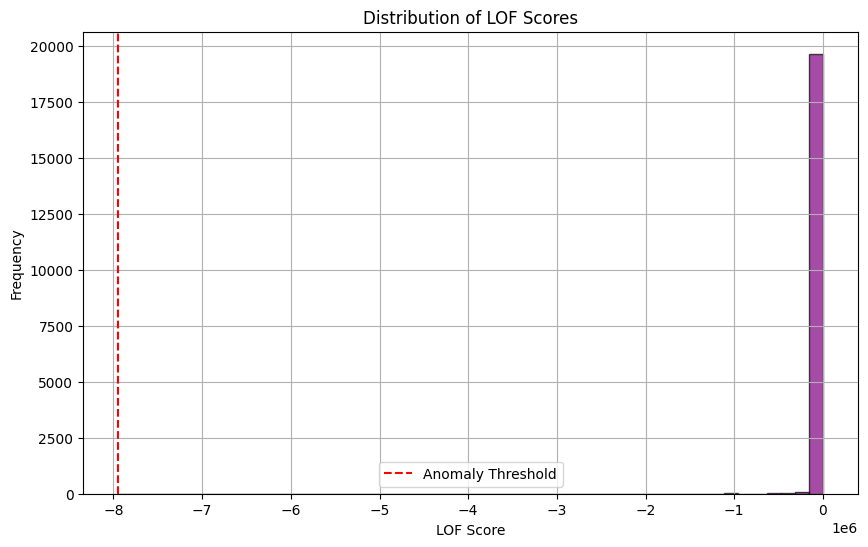

In [ ]:
# Histogram of LOF Scores
plt.figure(figsize=(10, 6))
plt.hist(data['LOF_Score'], bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribution of LOF Scores')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.axvline(x=min(data['LOF_Score']), color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Save the DataFrame as a Pickle file
data.to_pickle("LOF_model.pkl")

print("Pickle file saved as LOF_model.pkl")


Pickle file saved as LOF_model.pkl


In [ ]:
df=data

#Isolation Forest

In [ ]:
# Apply log transformation for Quantity
import numpy as np
data['Quantity_Log'] = np.log1p(data['Quantity'])

# Bin the Quantity column
bins = [0, 100, 500, 1000, 5000, np.inf]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
data['Quantity_Binned'] = pd.cut(data['Quantity'], bins=bins, labels=labels)

# Display transformed columns
data[['Quantity', 'Quantity_Log', 'Quantity_Binned']].head()


Quantity  Quantity_Log Quantity_Binned
0   1.499363e-10  1.499363e-10           0-100
96  2.076764e-09  2.076764e-09           0-100
97  5.413037e-10  5.413037e-10           0-100
98  1.064411e-06  1.064411e-06           0-100
99  8.359547e-10  8.359547e-10           0-100

In [ ]:
# Identify self-trades
data['Is_Self_Trade'] = data['From'] == data['To']

# Count the number of self-trades
num_self_trades = data['Is_Self_Trade'].sum()

# Display self-trade results
print("Number of Self-Trades:", num_self_trades)
print("\nExample Self-Trades:")
data[data['Is_Self_Trade']].head()


Number of Self-Trades: 0

Example Self-Trades:


Empty DataFrame
Columns: [Transaction Hash, Status, Method, BlockNo, DateTime (UTC), From, To, Quantity, Value (USD), Token, Betweenness Centrality, Degree Centrality, Closeness Centrality, TransactionFrequency, TransactionAmountRatio, LOF_Score, Outlier_Label, Index, Quantity_Log, Quantity_Binned, Is_Self_Trade]
Index: []

[0 rows x 21 columns]

In [ ]:
# Initialize a new column to mark circular trades
data['Is_Circular_Trade'] = False

# Group by 'From' and 'To' pairs
grouped_pairs = data.groupby(['From', 'To'])

# Identify pairs with multiple transactions
for (from_addr, to_addr), group in grouped_pairs:
    if len(group) > 1:  # If more than one transaction exists for the pair
        data.loc[group.index, 'Is_Circular_Trade'] = True

# Count the number of circular trades
num_circular_trades = data['Is_Circular_Trade'].sum()

# Display circular trade results
print("Number of Circular Trades:", num_circular_trades)
print("\nExample Circular Trades:")
data[data['Is_Circular_Trade']].head()

Number of Circular Trades: 4865

Example Circular Trades:


Transaction Hash   Status      Method  \
0   0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...  Success  0x771d503f   
96  0x5f483dd53589d4fb4a7f880419af6be62fc7bde0f384...  Success    Transfer   
97  0xe8e6f5dc10a34649713203547748e0d32134d6fa0909...  Success    Transfer   
98  0x775ffa594bad49240182f07912f256aff5cb7abfbeb2...  Success    Transfer   
99  0x1e98dd6403e638098345bf7634c2d82da2821f01156b...  Success    Transfer   

    BlockNo      DateTime (UTC)                                        From  \
0       0.0 2025-01-27 07:50:11  0x51c72848c68a965f66fa7a88855f9f7784502a7f   
96      0.0 2025-01-27 07:50:11  0xaacc7f8128b90e520bffa82800b7f7c1ecb6c275   
97      0.0 2025-01-27 07:50:11  0xcc4d17ae9fd68cdbc6143233cf75670af932944d   
98      0.0 2025-01-27 07:50:11  0xceb69f6342ece283b2f5c9088ff249b5d0ae66ea   
99      0.0 2025-01-27 07:50:11  0xdd3d72c53ff982ff59853da71158bf1538b3ceee   

                                            To      Quantity  Value (USD)  \
0   0x11b815efb8f581194ae79006d24e0d814b7697f6  1.499363e-10     0.066748   
96  0x1ab4973a48dc892cd9971ece8e01dcc7688f8f23  2.076764e-09     0.000301   
97  0x1ab4973a48dc892cd9971ece8e01dcc7688f8f23  5.413037e-10     0.000078   
98  0xb2243e7da71a3e22a3e4a777d30190d69f4a2fff  1.064411e-06     0.042424   
99  0xf0d513f7a77cb189e8807eac3d4c12de171fcada  8.359547e-10     0.000121   

                                Token  ...  Closeness Centrality  \
0                 Wrapped Ether(WETH)  ...              0.829333   
96                   Tether USD(USDT)  ...              0.000000   
97                   Tether USD(USDT)  ...              0.000000   
98                        Ribbon(RBN)  ...              0.000000   
99  Tether USD(USDT)﻿Transaction Hash  ...              0.000000   

    TransactionFrequency  TransactionAmountRatio  LOF_Score  Outlier_Label  \
0                     92            1.678552e-10  -1.033473              1   
96                     2            5.000000e-01  -1.963802              1   
97                     2            5.000000e-01  -1.093596              1   
98                     2            5.000000e-01 -39.480458             -1   
99                    11            6.663956e-03  -1.002991              1   

    Index  Quantity_Log  Quantity_Binned  Is_Self_Trade Is_Circular_Trade  
0       0  1.499363e-10            0-100          False              True  
96      1  2.076764e-09            0-100          False              True  
97      2  5.413037e-10            0-100          False              True  
98      3  1.064411e-06            0-100          False              True  
99      4  8.359547e-10            0-100          False              True  

[5 rows x 22 columns]

In [ ]:
data['Time_Diff'] = data['DateTime (UTC)'].diff().dt.total_seconds().fillna(0)

In [ ]:
# Ensure the DataFrame is sorted by 'DateTime (UTC)' for proper rolling calculations
data = data.sort_values(by='DateTime (UTC)')

# Define the rolling window size (e.g., 5 transactions)
window_size = 5

# Calculate rolling mean and standard deviation for 'Quantity'
data['Rolling_Mean_Quantity'] = data['Quantity'].rolling(window=window_size).mean()
data['Rolling_Std_Quantity'] = data['Quantity'].rolling(window=window_size).std()

# Display the rolling statistics
print("Rolling Statistics (Mean and Std):")
data[['Quantity', 'Rolling_Mean_Quantity', 'Rolling_Std_Quantity']].head(window_size + 5)


Rolling Statistics (Mean and Std):


Quantity  Rolling_Mean_Quantity  Rolling_Std_Quantity
0   1.499363e-10                    NaN                   NaN
1   4.612912e-07                    NaN                   NaN
74  6.761197e-13                    NaN                   NaN
16  7.947589e-08                    NaN                   NaN
18  5.416145e-10           1.082919e-07          2.002940e-07
35  2.827791e-08           1.139175e-07          1.968629e-07
19  1.034932e-08           2.372908e-08          3.319681e-08
34  4.379557e-09           2.460486e-08          3.246400e-08
33  9.954455e-06           1.999601e-06          4.446912e-06
32  3.806316e-02           7.614632e-03          1.702125e-02

In [ ]:
# Calculate the IQR for Quantity
Q1 = data['Quantity'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Quantity'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
data['Is_Outlier'] = (data['Quantity'] < lower_bound) | (data['Quantity'] > upper_bound)

# Cap outliers at the bounds
data['Quantity_Capped'] = data['Quantity'].clip(lower=lower_bound, upper=upper_bound)

# Display the results
print("Outlier Detection and Capping:")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of Outliers Detected: {data['Is_Outlier'].sum()}")
print("\nSample Data with Capped Quantity:")
data[['Quantity', 'Is_Outlier', 'Quantity_Capped']].head(10)

Outlier Detection and Capping:
Lower Bound: -1.291810264464438e-07, Upper Bound: 2.1549957767708647e-07
Number of Outliers Detected: 974

Sample Data with Capped Quantity:


Quantity  Is_Outlier  Quantity_Capped
0   1.499363e-10       False     1.499363e-10
1   4.612912e-07        True     2.154996e-07
74  6.761197e-13       False     6.761197e-13
16  7.947589e-08       False     7.947589e-08
18  5.416145e-10       False     5.416145e-10
35  2.827791e-08       False     2.827791e-08
19  1.034932e-08       False     1.034932e-08
34  4.379557e-09       False     4.379557e-09
33  9.954455e-06        True     2.154996e-07
32  3.806316e-02        True     2.154996e-07

In [ ]:
# Unusual Trades Based on Frequency (Very High Activity)
transaction_counts = data.groupby('From').size().reset_index(name='Transaction_Count')
high_activity_threshold = transaction_counts['Transaction_Count'].quantile(0.95)  # Top 5% active addresses
high_activity_addresses = transaction_counts[transaction_counts['Transaction_Count'] > high_activity_threshold]['From']

# Create the 'Is_High_Activity' column
data['Is_High_Activity'] = data['From'].isin(high_activity_addresses) # Check if 'From' address is in high_activity_addresses

print("\nUnusual Trades Based on High Activity:")
data[data['Is_High_Activity']].head()


Unusual Trades Based on High Activity:


Transaction Hash   Status      Method  \
0   0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...  Success  0x771d503f   
1   0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...  Success  0x771d503f   
73  0x8daeb683103769d86cbab2a7b54c5037e788ac0cc88a...  Success  0x2213bc0b   
2   0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...  Success  0x771d503f   
3   0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...  Success  0x771d503f   

    BlockNo      DateTime (UTC)                                        From  \
0       0.0 2025-01-27 07:50:11  0x51c72848c68a965f66fa7a88855f9f7784502a7f   
1       0.0 2025-01-27 07:50:11  0x11b815efb8f581194ae79006d24e0d814b7697f6   
73      0.0 2025-01-27 07:50:11  0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710   
2       0.0 2025-01-27 07:50:11  0x51c72848c68a965f66fa7a88855f9f7784502a7f   
3       0.0 2025-01-27 07:50:11  0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640   

                                            To      Quantity  Value (USD)  \
0   0x11b815efb8f581194ae79006d24e0d814b7697f6  1.499363e-10     0.066748   
1   0x51c72848c68a965f66fa7a88855f9f7784502a7f  4.612912e-07     0.066801   
73  0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6  6.761197e-13     0.000022   
2   0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1.966014e-10     0.087522   
3   0x51c72848c68a965f66fa7a88855f9f7784502a7f  6.045479e-07     0.087604   

                          Token  ...  Quantity_Log  Quantity_Binned  \
0           Wrapped Ether(WETH)  ...  1.499363e-10            0-100   
1              Tether USD(USDT)  ...  4.612911e-07            0-100   
73  Wrapped SOL (Wormhole)(SOL)  ...  6.761197e-13            0-100   
2           Wrapped Ether(WETH)  ...  1.966014e-10            0-100   
3                    USDC(USDC)  ...  6.045478e-07            0-100   

    Is_Self_Trade  Is_Circular_Trade  Time_Diff  Rolling_Mean_Quantity  \
0           False               True        0.0                    NaN   
1           False               True        0.0                    NaN   
73          False               True        0.0           6.919313e-06   
2           False               True        0.0           1.656920e-07   
3           False               True        0.0           2.831518e-07   

    Rolling_Std_Quantity  Is_Outlier  Quantity_Capped Is_High_Activity  
0                    NaN       False     1.499363e-10             True  
1                    NaN        True     2.154996e-07             True  
73          1.522424e-05       False     6.761197e-13             True  
2           3.594456e-07       False     1.966014e-10             True  
3           3.931856e-07        True     2.154996e-07             True  

[5 rows x 28 columns]

Number of Nodes: 875
Number of Edges: 838


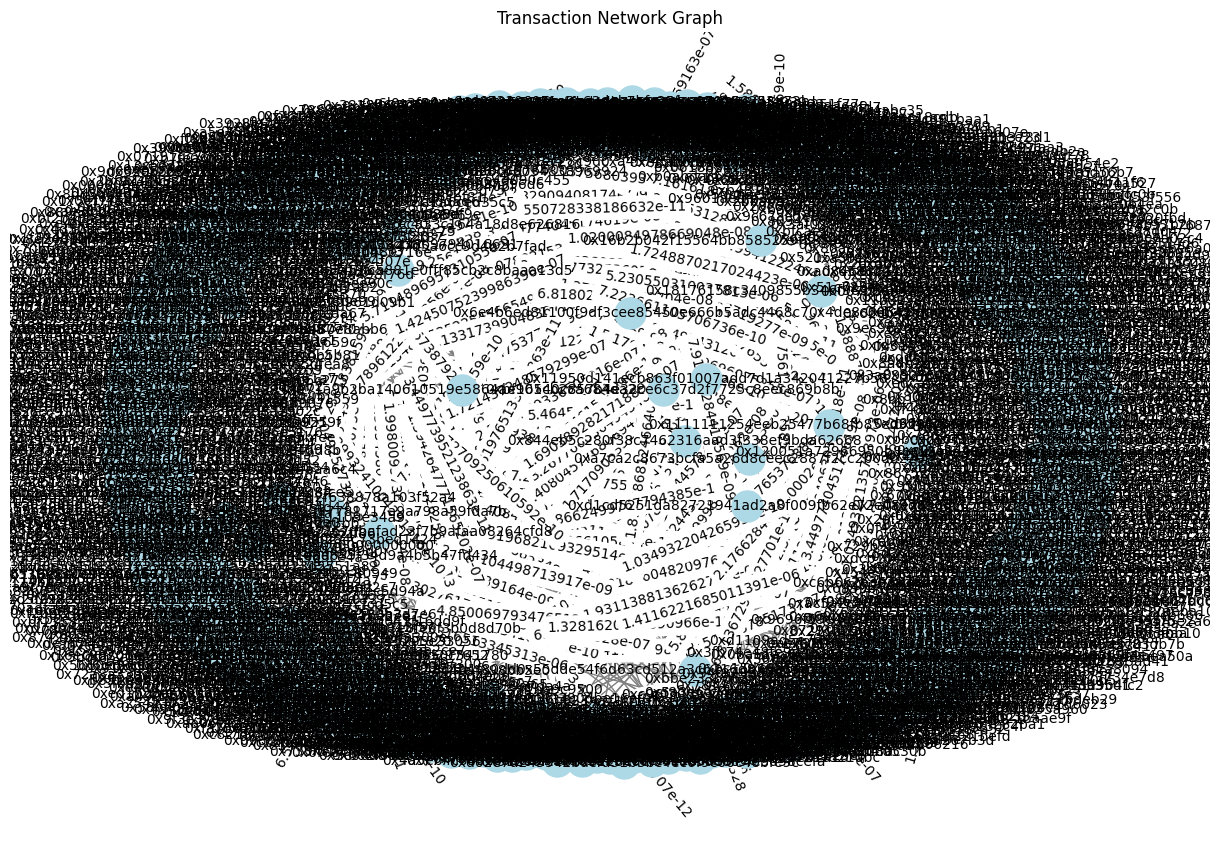

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a directed graph
G = nx.DiGraph()

# Ensure 'Quantity' column is numeric (in case of any non-numeric data)
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Add edges to the graph using 'From' and 'To' as nodes and 'Quantity' as the edge weight
for _, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Display basic graph information
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")

# Visualize the graph (simple visualization for small graphs)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for node positioning
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color="lightblue",
    font_size=10,
    edge_color="gray"
)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Transaction Network Graph")
plt.show()


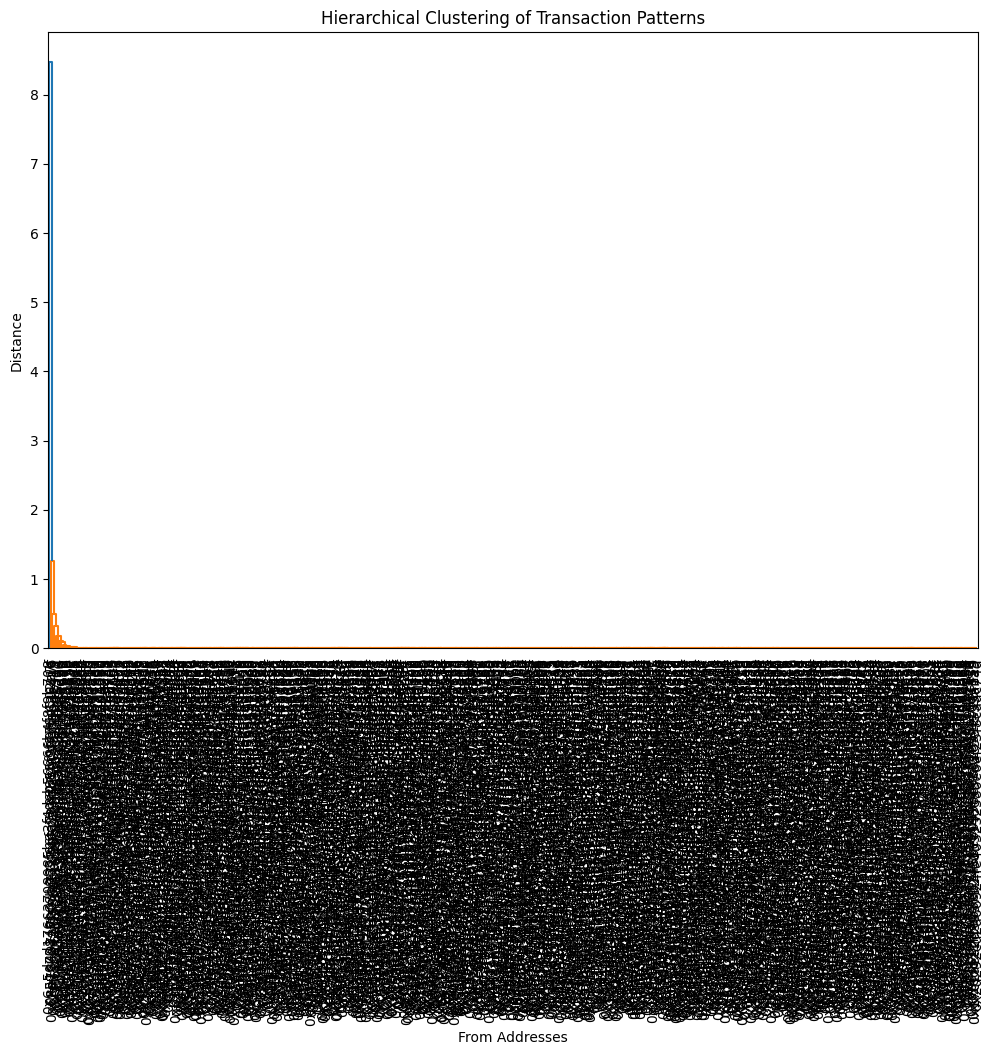

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Create a feature matrix based on transaction patterns
# Aggregating 'Quantity' by 'From' and 'To' addresses
feature_matrix = data.groupby(['From', 'To'])['Quantity'].sum().unstack(fill_value=0)

# Calculate the linkage matrix
# Using Ward's method to minimize variance within clusters
linkage_matrix = linkage(pdist(feature_matrix), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=feature_matrix.index,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering of Transaction Patterns")
plt.xlabel("From Addresses")
plt.ylabel("Distance")
plt.show()

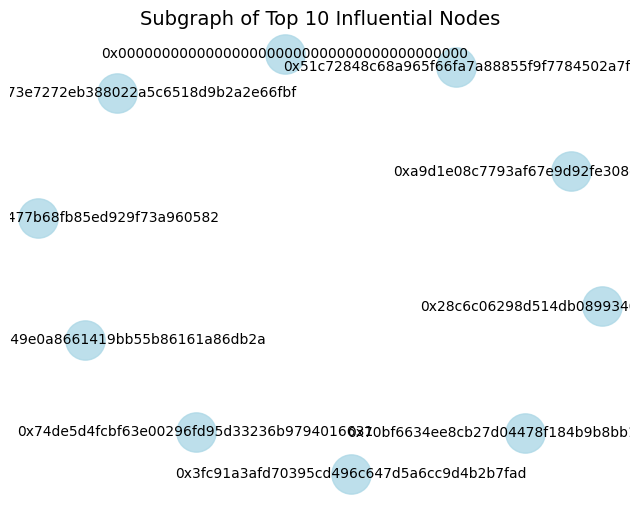

In [ ]:
# Calculate degree centrality for each node
centrality = nx.degree_centrality(G)

# Create a DataFrame to store node centrality
centrality_df = pd.DataFrame(centrality.items(), columns=['Node', 'Centrality'])

# Sort the DataFrame by centrality in descending order
centrality_df = centrality_df.sort_values(by='Centrality', ascending=False)

# Extract subgraph for top 10 nodes by degree
top_nodes = centrality_df['Node'].head(10).tolist()
subgraph = G.subgraph(top_nodes)

# Visualize the subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, k=0.3)  # Layout for better spacing
nx.draw_networkx_nodes(subgraph, pos, node_size=800, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(subgraph, pos, width=2, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')
plt.title("Subgraph of Top 10 Influential Nodes", fontsize=14)
plt.axis("off")
plt.show()

In [ ]:
# Calculate centrality metrics using NetworkX
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Convert centrality metrics into DataFrame
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree_Centrality': list(degree_centrality.values()),
    'Betweenness_Centrality': list(betweenness_centrality.values()),
    'Closeness_Centrality': list(closeness_centrality.values())
})

# Merge centrality metrics with the original data
data = pd.merge(data, centrality_df, left_on='From', right_on='Node', how='left')

In [ ]:
data.columns

Index(['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Value (USD)', 'Token',
       'Betweenness Centrality', 'Degree Centrality', 'Closeness Centrality',
       'TransactionFrequency', 'TransactionAmountRatio', 'LOF_Score',
       'Outlier_Label', 'Index', 'Quantity_Log', 'Quantity_Binned',
       'Is_Self_Trade', 'Is_Circular_Trade', 'Time_Diff',
       'Rolling_Mean_Quantity', 'Rolling_Std_Quantity', 'Is_Outlier',
       'Quantity_Capped', 'Is_High_Activity', 'Node', 'Degree_Centrality',
       'Betweenness_Centrality', 'Closeness_Centrality'],
      dtype='object')

In [ ]:
data.to_csv('features_data.csv', index=False)

In [ ]:
data_iof=data.copy()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split

In [ ]:
features_to_use = [
    'Quantity',
    'Quantity_Log',
    'Time_Diff',
    'Rolling_Mean_Quantity',
    'Rolling_Std_Quantity',
    'Is_Self_Trade',
    'Is_Circular_Trade',
    'Is_High_Activity',
    'Quantity_Capped',
    'Degree_Centrality',
    'Betweenness_Centrality',
    'Closeness_Centrality'
]

X = data_iof[features_to_use]

# Handle missing values by filling them with the column's median
X = X.fillna(X.median())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (80% training, 20% testing)
X_train, X_test = train_test_split(X_scaled , test_size=0.2, random_state=42)

rng = np.random.RandomState(42)

# Initialize the Isolation Forest model with the provided parameters
model_if = IsolationForest(n_estimators=100,contamination=0.02,random_state=rng)

model_if.fit(X_train)

# Predict anomalies (1 for normal, -1 for anomaly)
anomaly_predictions = model_if.predict(X_scaled )

# Add anomaly predictions to the original data
data_iof['Anomaly'] = anomaly_predictions

# Get the anomaly scores (the lower the score, the more abnormal)
anomaly_scores = model_if.decision_function(X_scaled )

# Add the anomaly scores to the data
data_iof['Anomaly_Score'] = anomaly_scores

# View the data with anomaly scores
print(data_iof[['Quantity', 'Rolling_Std_Quantity', 'Anomaly', 'Anomaly_Score']].head())

       Quantity  Rolling_Std_Quantity  Anomaly  Anomaly_Score
0  1.499363e-10                   NaN        1       0.220117
1  4.612912e-07                   NaN        1       0.162301
2  6.761197e-13                   NaN        1       0.289432
3  7.947589e-08                   NaN        1       0.261375
4  5.416145e-10          2.002940e-07        1       0.289200


In [ ]:
# Print anomaly statistics
print(data_iof['Anomaly'].value_counts())

Anomaly
 1    4898
-1     102
Name: count, dtype: int64


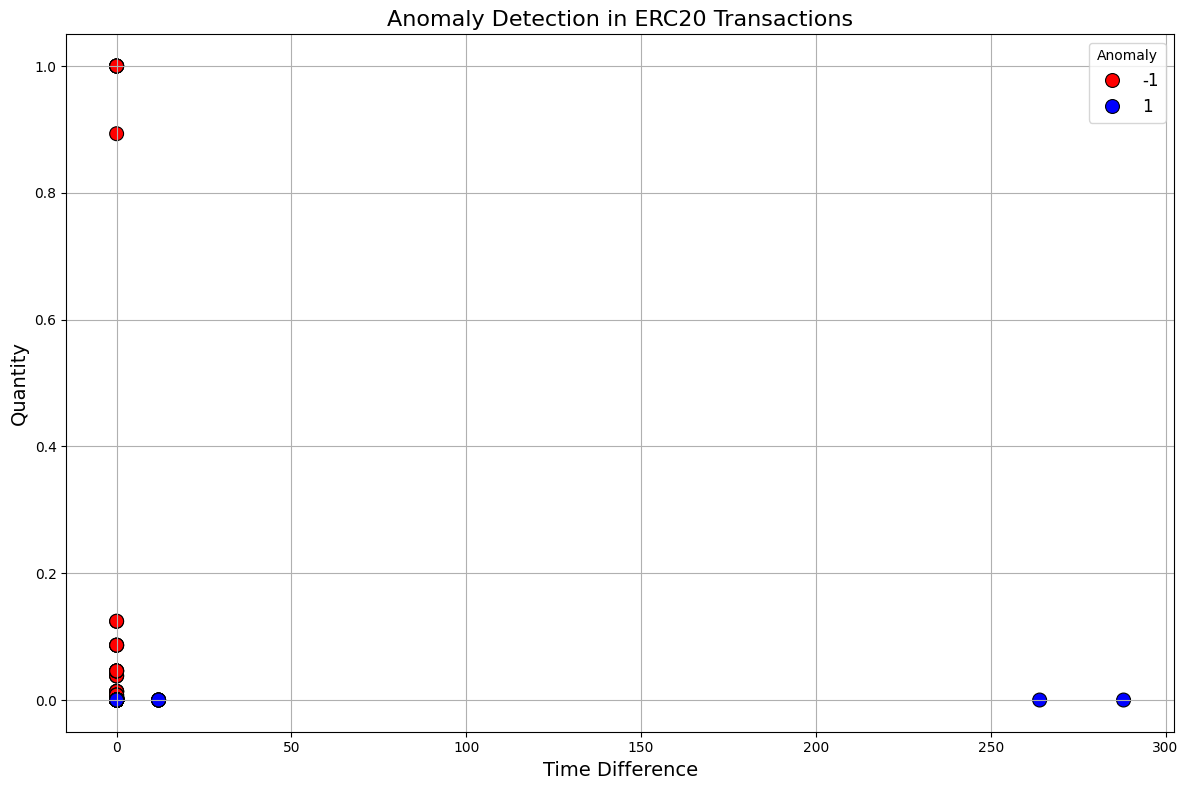

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize anomalies clearly using 'Time_Diff' and 'Quantity' columns
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data_iof, x='Time_Diff', y='Quantity', hue='Anomaly', palette={1: 'blue', -1: 'red'}, s=100, edgecolor='k')

# Set title and labels
plt.title('Anomaly Detection in ERC20 Transactions', fontsize=16)
plt.xlabel('Time Difference', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

# Add a legend to distinguish anomalies
plt.legend(title='Anomaly', loc='upper right', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_plot(data_iof, outlier_method_name, x_var, y_var,
                 xaxis_limits=None, yaxis_limits=None):
    print(f'Outlier Method: {outlier_method_name}')


    if 'Anomaly' not in data_iof.columns:
        raise ValueError("The 'Anomaly' column is not present in the dataset.")

    # Print anomaly counts
    print(f"Number of anomalous values: {len(data_iof[data_iof['Anomaly'] == -1])}")
    print(f"Number of non-anomalous values: {len(data_iof[data_iof['Anomaly'] == 1])}")
    print(f'Total Number of Values: {len(data_iof)}')

    # Create the FacetGrid plot
    try:
        g = sns.FacetGrid(data_iof, col='Anomaly', height=4, hue='Anomaly', hue_order=[-1, 1])
        g.map(sns.scatterplot, x_var, y_var, alpha=0.7, s=50)
        g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.05, fontweight='bold')

        # Set axis limits if specified
        if xaxis_limits:
            g.set(xlim=xaxis_limits)
        if yaxis_limits:
            g.set(ylim=yaxis_limits)

        # Customize subplot titles
        axes = g.axes.flatten()
        if len(axes) > 0:
            axes[0].set_title(f"Outliers\n{len(data_iof[data_iof['Anomaly'] == -1])} points")
        if len(axes) > 1:
            axes[1].set_title(f"Inliers\n{len(data_iof[data_iof['Anomaly'] == 1])} points")
    except IndexError:
        print("Error: Expected categories in 'Anomaly' column are missing or incorrect.")
        return None

    return g


Outlier Method: Isolation Forest
Number of anomalous values: 102
Number of non-anomalous values: 4898
Total Number of Values: 5000


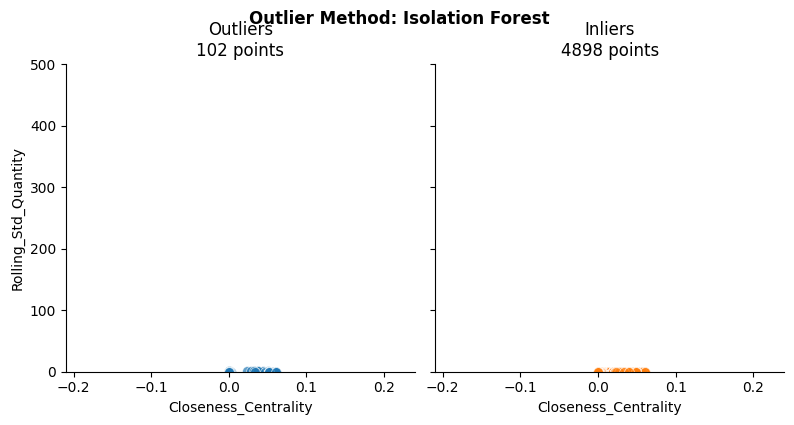

In [ ]:
outlier_plot(data_iof, 'Isolation Forest', 'Closeness_Centrality', 'Rolling_Std_Quantity',
             xaxis_limits=[-0.21,0.24], yaxis_limits=[0,500])

<ipython-input-65-e113e284b24d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


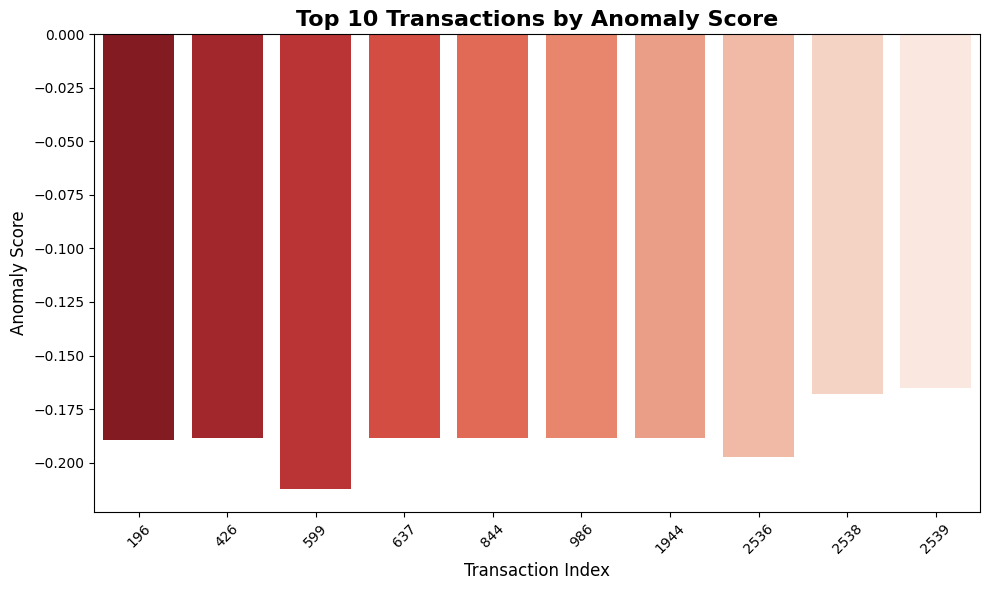

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_anomalies(data_iof, score_column, top_n=10):
    # Sort the data by anomaly score in ascending order (more anomalous first)
    top_anomalies = data_iof.nsmallest(top_n, score_column)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_anomalies,
        x=top_anomalies.index,
        y=score_column,
        palette="Reds_r"
    )
    plt.title(f'Top {top_n} Transactions by Anomaly Score', fontsize=16, fontweight='bold')
    plt.xlabel('Transaction Index', fontsize=12)
    plt.ylabel('Anomaly Score', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage example
visualize_top_anomalies(data_iof, 'Anomaly_Score', top_n=10)


feature imporatance

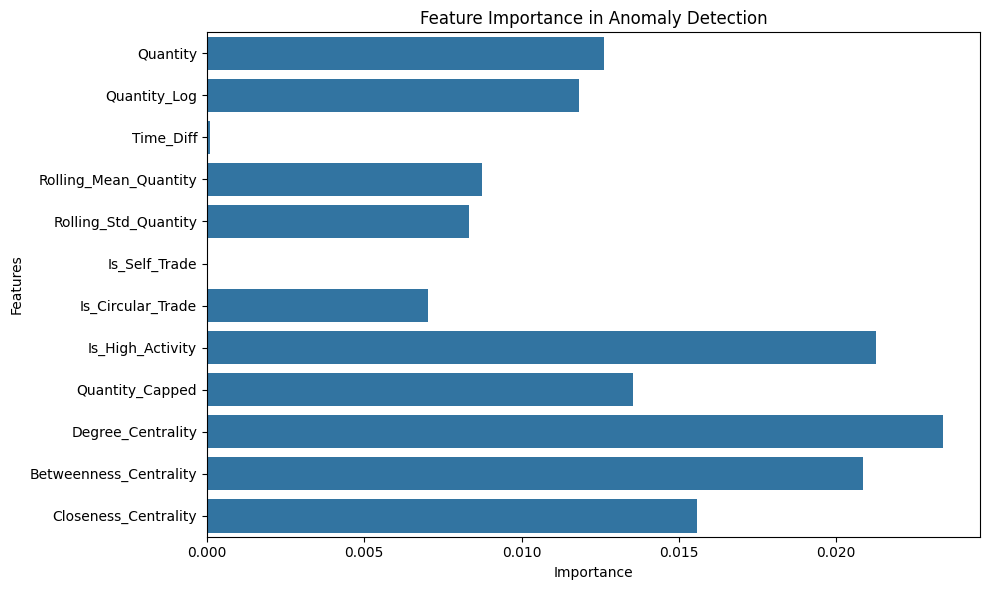

In [ ]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to compute permutation feature importance manually
def compute_permutation_importance(model, X, feature_indices, n_repeats=10):
    baseline_scores = model.decision_function(X)
    feature_importances = np.zeros(len(feature_indices))

    for i, feature_idx in enumerate(feature_indices):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            X_permuted[:, feature_idx] = shuffle(X[:, feature_idx], random_state=42)
            permuted_scores = model.decision_function(X_permuted)
            scores.append(np.mean(np.abs(baseline_scores - permuted_scores)))
        feature_importances[i] = np.mean(scores)

    return feature_importances


feature_indices = list(range(X_scaled.shape[1])) # Get indices for all features

# Compute feature importance
feature_importance = compute_permutation_importance(
    model_if, X_scaled[:, feature_indices], feature_indices
)

features = [features_to_use[i] for i in feature_indices]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, orient="h")
plt.title('Feature Importance in Anomaly Detection')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


##hyper parameter tuning for Isolation Forest Model


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for Isolation Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_samples': ['auto', 0.5, 0.7, 0.8],
    'contamination': [0.01, 0.05, 0.1, 0.15],
    'max_features': [1.0, 0.5, 0.8],
    'random_state': [42]
}

# Select the relevant features
X = data_iof[[
    'Quantity', 'Quantity_Log', 'Time_Diff', 'Rolling_Mean_Quantity',
    'Rolling_Std_Quantity', 'Is_Self_Trade','Is_Circular_Trade',
    'Is_High_Activity', 'Quantity_Capped','Degree_Centrality',
    'Betweenness_Centrality', 'Closeness_Centrality'
]]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Isolation Forest model
iso_forest = IsolationForest()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=iso_forest,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error', # Scoring metric for model evaluation
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel processing
)

# Fit the model with the parameter grid
random_search.fit(X_scaled)

# Get the best parameters and best score
print("Best parameters found: ", random_search.best_params_)

# Access the best model from the random search
best_iso_forest = random_search.best_estimator_

# Predict anomalies (1 for inliers, -1 for anomalies)
anomaly_predictions = best_iso_forest.predict(X_scaled)

# Convert anomaly predictions to binary (1 for inliers, -1 for outliers)
data_iof.loc[:, 'Anomaly'] = np.where(anomaly_predictions == 1, 1, -1)

# Get the anomaly scores
data_iof.loc[:, 'Anomaly_Score'] = best_iso_forest.decision_function(X_scaled)

# View the data with anomaly scores
print(data_iof[['Quantity', 'Time_Diff', 'Anomaly', 'Anomaly_Score']].head())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'random_state': 42, 'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.8, 'contamination': 0.01}
       Quantity  Time_Diff  Anomaly  Anomaly_Score
0  1.499363e-10        0.0        1       0.123548
1  4.612912e-07        0.0        1       0.092820
2  6.761197e-13        0.0        1       0.165154
3  7.947589e-08        0.0        1       0.148797
4  5.416145e-10        0.0        1       0.166467


In [ ]:
data_iof.columns

Index(['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Value (USD)', 'Token',
       'Betweenness Centrality', 'Degree Centrality', 'Closeness Centrality',
       'TransactionFrequency', 'TransactionAmountRatio', 'LOF_Score',
       'Outlier_Label', 'Index', 'Quantity_Log', 'Quantity_Binned',
       'Is_Self_Trade', 'Is_Circular_Trade', 'Time_Diff',
       'Rolling_Mean_Quantity', 'Rolling_Std_Quantity', 'Is_Outlier',
       'Quantity_Capped', 'Is_High_Activity', 'Node', 'Degree_Centrality',
       'Betweenness_Centrality', 'Closeness_Centrality', 'Anomaly',
       'Anomaly_Score'],
      dtype='object')

In [ ]:
# Print anomaly statistics
print(data_iof['Anomaly'].value_counts())

Anomaly
 1    4950
-1      50
Name: count, dtype: int64


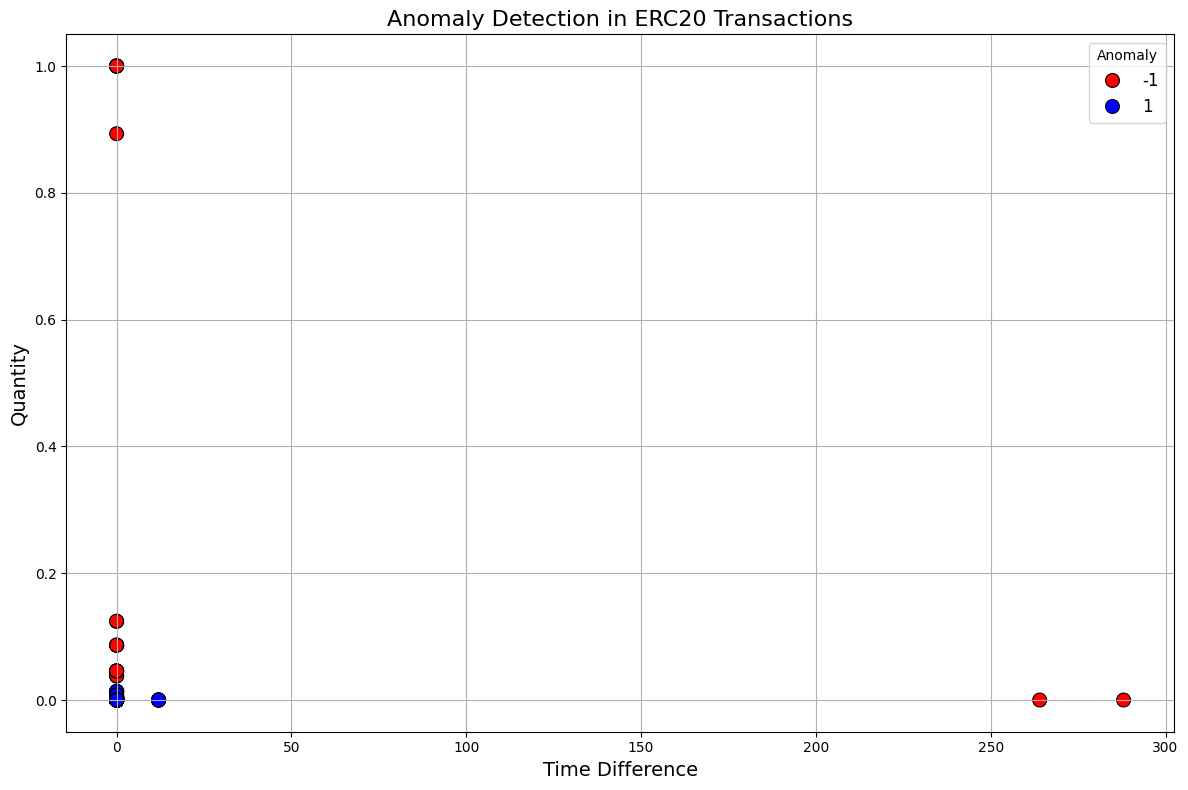

In [ ]:
# Visualize anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data_iof,
    x='Time_Diff',
    y='Quantity',
    hue='Anomaly',
    palette={-1: 'red', 1: 'blue'},
    s=100,
    edgecolor='k'
)
plt.title('Anomaly Detection in ERC20 Transactions', fontsize=16)
plt.xlabel('Time Difference', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.legend(title='Anomaly', loc='upper right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get the best parameters and best score
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'random_state': 42, 'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.8, 'contamination': 0.01}


#generated isolation_forest_train_predictions.csv for ensembling


In [ ]:
# Select the relevant columns for ensembling
isolation_forest_predictions = data_iof[['Anomaly', 'Anomaly_Score']].copy()

# Safely add the 'Input Data' column using .loc
isolation_forest_predictions.loc[:, 'Input Data'] = data_iof.index

isolation_forest_predictions = isolation_forest_predictions[['Input Data', 'Anomaly', 'Anomaly_Score']]

# Save the updated data (with predictions) to a CSV file
isolation_forest_predictions.to_csv('isolation_forest_predictions.csv', index=False)

# Confirm that the file is saved
print("Isolation forest predictions with input data index saved to 'isolation_forest_predictions.csv'")


Isolation forest predictions with input data index saved to 'isolation_forest_predictions.csv'


In [ ]:
data_iof.to_csv('final_data.csv', index=False)

#Testing for Isolation Forest


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import joblib

# Train your model on the scaled data
model = best_iso_forest
model.fit(X_scaled)

# Save the model and scaler
joblib.dump(model, 'iso_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler for later use


['scaler.pkl']

In [ ]:
import pandas as pd

# Load the Excel file and get the sheet names
excel_file = '/content/NEAR_token_transaction_data.xlsx'
xls = pd.ExcelFile(excel_file)

# Print sheet names
print(xls.sheet_names)


['export-token-0x85f17cf997934a59']


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
import joblib

# Function to compute features based on user input
def extract_features(new_data, graph):
    new_data['Quantity_Log'] = np.log(new_data['Quantity'] + 1)


    new_data['UnixTimestamp'] = pd.to_datetime(new_data['UnixTimestamp'], unit='s')

    # Calculate time difference (in seconds)
    new_data['Time_Diff'] = new_data['UnixTimestamp'].diff().fillna(pd.Timedelta(0)).dt.total_seconds()

    # Rolling statistics
    new_data['Rolling_Mean_Quantity'] = new_data['Quantity'].rolling(window=5, min_periods=1).mean()
    new_data['Rolling_Std_Quantity'] = new_data['Quantity'].rolling(window=5, min_periods=1).std()

    # Identifying anomalies
    new_data['Is_Self_Trade'] = (new_data['From'] == new_data['To']).astype(int)
    new_data['Is_Circular_Trade'] = (new_data['From'].duplicated() & new_data['To'].duplicated()).astype(int)
    new_data['Is_High_Activity'] = (new_data['Quantity'] > new_data['Quantity'].quantile(0.75)).astype(int)
    new_data['Quantity_Capped'] = new_data['Quantity'].clip(upper=new_data['Quantity'].quantile(0.95))

    # Add centrality metrics
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)

    # Map centrality metrics to the new data
    new_data['Degree_Centrality'] = new_data['From'].map(degree_centrality).fillna(0)
    new_data['Betweenness_Centrality'] = new_data['From'].map(betweenness_centrality).fillna(0)
    new_data['Closeness_Centrality'] = new_data['From'].map(closeness_centrality).fillna(0)

    return new_data

# Load the pre-trained model and scaler
model = joblib.load('iso_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Rebuild the graph (based on training data)
data = pd.read_excel(excel_file, sheet_name='export-token-0x85f17cf997934a59')
G = nx.DiGraph()

# Add edges to the graph using training data
for _, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Input from the user
transaction_hash = '0x2fc6a64eced2193850c860653a7a81944c227079370d40ca8dcea39043adfe4c'
blockno = 20107422
unix_timestamp = 1718577983
datetime_utc = '6/16/24 22:46'
from_address = '0xbc6a5cfcf24eacda3c25c042494ef21b77165738'
to_address = '0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea'
quantity = 300
method = 'Unoswap'

# Create a DataFrame from the user input
user_input_data = pd.DataFrame({
    'Transaction Hash': [transaction_hash],
    'Blockno': [blockno],
    'UnixTimestamp': [unix_timestamp],
    'DateTime (UTC)': [datetime_utc],
    'From': [from_address],
    'To': [to_address],
    'Quantity': [quantity],
    'Method': [method]
})

# Apply feature extraction to the user input
user_input_data = extract_features(user_input_data, G)

# Select the relevant features that were used during model training
X_user_input = user_input_data[['Quantity', 'Quantity_Log', 'Time_Diff', 'Rolling_Mean_Quantity',
                                'Rolling_Std_Quantity', 'Is_Self_Trade', 'Is_Circular_Trade',
                                'Is_High_Activity', 'Quantity_Capped', 'Degree_Centrality',
                                'Betweenness_Centrality', 'Closeness_Centrality']]

# Scale the features using the pre-trained scaler
X_user_input_scaled = scaler.transform(X_user_input)

# Predict anomalies (1 for normal, -1 for anomaly)
anomaly_prediction = model.predict(X_user_input_scaled)

# Convert anomaly prediction to binary (1 for outlier, 0 for inlier)
result = "Anomaly Detected" if anomaly_prediction[0] == 1 else "Normal Transaction"

# Display the result
print(f"Transaction Hash: {transaction_hash}")
print(f"Prediction: {result}")


Transaction Hash: 0x2fc6a64eced2193850c860653a7a81944c227079370d40ca8dcea39043adfe4c
Prediction: Normal Transaction


In [ ]:
import joblib

# Load the saved model and scaler
model = joblib.load('iso_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

**One Class SVM , ENSEMBLE (ISOLATION FOREST, LOF , OSVM)**

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the ERC20 dataset (normalised datset from sprint1 saved in csv format)
data_path = "preprocessed_normalized_dataset.csv"
df_preprocessed = pd.read_csv(data_path)

# Define features and data
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality',
    'Sender_Transaction_Count', 'Receiver_Transaction_Count',
    'Sender_Total_Quantity', 'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]
X = df_preprocessed[features]





**PCA , RFE , FEATURE IMPORTANCE AND RANKING**

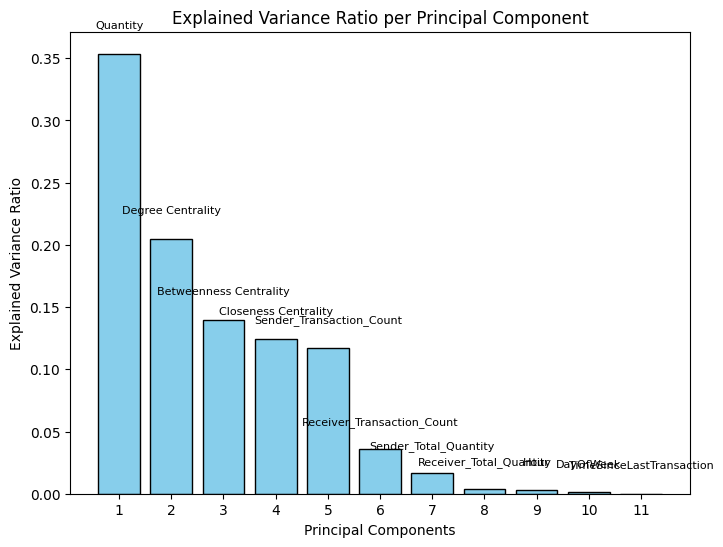


Total Explained Variance by PCA Components:
1.0


NameError: name 'X_pca' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
data_path = "preprocessed_normalized_dataset.csv"
df_preprocessed = pd.read_csv(data_path)
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality',
    'Sender_Transaction_Count', 'Receiver_Transaction_Count',
    'Sender_Total_Quantity', 'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]
X = df_preprocessed[features]
#PCA (reduce to as many components as necessary)
pca = PCA(n_components=len(features))  #all components for full analysis
pca.fit(X)

#contributions to each principal component)
feature_loadings = pca.components_

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Label the x-axis for each principal component

# Annotate the plot with feature names based on their contribution to PC1 and PC2
for i, feature in enumerate(features):
    plt.text(i + 1, pca.explained_variance_ratio_[i] + 0.02, feature, color='black', fontsize=8, ha='center')

plt.show()
print("\nTotal Explained Variance by PCA Components:")
print(np.sum(pca.explained_variance_ratio_))  # Total explained variance across all components

# Apply PCA transformation and store the result in X_pca
X_pca = pca.transform(X)

# Visualize the 2D projection of the dataset based on the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='dodgerblue', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Projection of ERC-20 Token Transactions')
plt.grid(True)
plt.show()

# RFE - Recursive Feature Elimination


# Apply RFE using Logistic Regression as the estimator (ensure you have the target variable 'y')
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Display the selected features based on RFE
selected_features = np.array(features)[rfe.support_]
print("Selected Features:", selected_features)

# Visualize the ranking of features based on their importance from RFE
plt.figure(figsize=(8, 6))
plt.barh(features, rfe.ranking_, color='lightcoral', edgecolor='black')
plt.xlabel('Feature Ranking (1 = Most Important)')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


**FUNCTIONS FOR VISUALISATION (ie SCATTERPLOT) AND MODELS TO BE USED.**

In [ ]:
def plot_scatter(model_name, preds, color, x_feature, y_feature):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[x_feature], X[y_feature],
                c=[color if p == 1 else "gray" for p in preds], alpha=0.5)
    plt.title(f"Anomalies Detected by {model_name}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(["Anomaly", "Normal"], loc="upper right")
    plt.show()

    # Metrics for each model
models = {
    "Isolation Forest": iso_preds,
    "Local Outlier Factor": lof_preds,
    "One-Class SVM": svm_preds,
    "Ensemble Voting": ensemble_preds
}

NameError: name 'ensemble_preds' is not defined

**INITIALISING ISOLATION FOREST MODEL , LOF MODEL , ONE-SVM MODEL AND COMPUTING TOTAL ANOMALIES DETECTED BY EACH MODEL.**

In [ ]:
# 1. Isolation Forest
print("\n Isolation Forest")
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
iso_preds = isolation_forest.fit_predict(X)
iso_preds = np.where(iso_preds == -1, 1, 0)
print(f"Anomalies Detected (Isolation Forest): {sum(iso_preds)}")

# 2. Local Outlier Factor
print("\n Local Outlier Factor")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_preds = lof.fit_predict(X)
lof_preds = np.where(lof_preds == -1, 1, 0)
print(f"Anomalies Detected (LOF): {sum(lof_preds)}")

# 3. One-Class SVM
print("\n One-Class SVM")
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
one_class_svm.fit(X)
svm_preds = one_class_svm.predict(X)
svm_preds = np.where(svm_preds == -1, 1, 0)
print(f"Anomalies Detected (One-Class SVM): {sum(svm_preds)}")


 Isolation Forest
Anomalies Detected (Isolation Forest): 992

 Local Outlier Factor
Anomalies Detected (LOF): 992

 One-Class SVM
Anomalies Detected (One-Class SVM): 1000


**CHECKING FOR OVERLAP OF ANOMALIES ACROSS ALL MODELS.**

In [ ]:
# Calculate Overlap of Anomalies
overlap = (iso_preds + lof_preds + svm_preds) >= 2
print(f"Overlap of Anomalies (Detected by 2+ models): {sum(overlap)}")

# Overlap Analysis
iso_lof_overlap = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 0))
lof_svm_overlap = sum((lof_preds == 1) & (svm_preds == 1) & (iso_preds == 0))
iso_svm_overlap = sum((iso_preds == 1) & (svm_preds == 1) & (lof_preds == 0))
all_three_overlap = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 1))

print(f"Overlap between Isolation Forest and LOF: {iso_lof_overlap}")
print(f"Overlap between LOF and SVM: {lof_svm_overlap}")
print(f"Overlap between Isolation Forest and SVM: {iso_svm_overlap}")
print(f"Overlap among all three models: {all_three_overlap}")

Overlap of Anomalies (Detected by 2+ models): 481
Overlap between Isolation Forest and LOF: 122
Overlap between LOF and SVM: 69
Overlap between Isolation Forest and SVM: 234
Overlap among all three models: 56


**OVERLAP - VISUALISATIONS : BAR CHART**

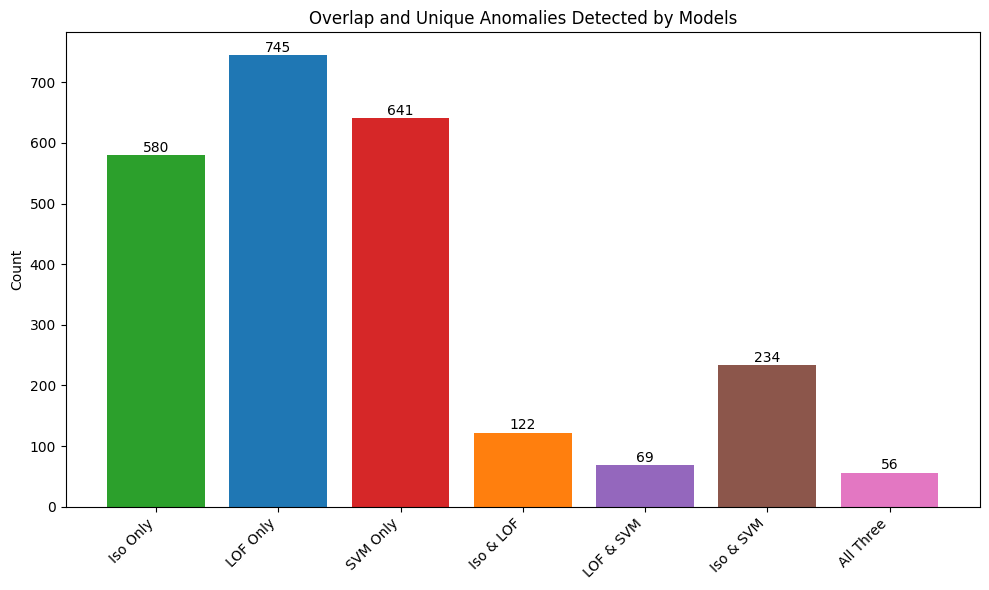

In [ ]:
# Overlap and Unique Anomalies Bar Chart
unique_iso = sum((iso_preds == 1) & (lof_preds == 0) & (svm_preds == 0))
unique_lof = sum((lof_preds == 1) & (iso_preds == 0) & (svm_preds == 0))
unique_svm = sum((svm_preds == 1) & (iso_preds == 0) & (lof_preds == 0))
overlap_iso_lof = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 0))
overlap_lof_svm = sum((lof_preds == 1) & (svm_preds == 1) & (iso_preds == 0))
overlap_iso_svm = sum((iso_preds == 1) & (svm_preds == 1) & (lof_preds == 0))
overlap_all = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 1))

overlap_data = {
    "Iso Only": unique_iso,
    "LOF Only": unique_lof,
    "SVM Only": unique_svm,
    "Iso & LOF": overlap_iso_lof,
    "LOF & SVM": overlap_lof_svm,
    "Iso & SVM": overlap_iso_svm,
    "All Three": overlap_all
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(overlap_data.keys(), overlap_data.values(), color=['#2ca02c', '#1f77b4', '#d62728',
                                                                  '#ff7f0e', '#9467bd', '#8c564b', '#e377c2'])
plt.title("Overlap and Unique Anomalies Detected by Models")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add counts above the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


**INITIALISING ENSEMBLE VOTING TAKING INTO ACCOUNT ALL THE 3 MODELS.**

In [ ]:
# 4. Ensemble Voting
print("\n Ensemble Voting")
ensemble_votes = iso_preds + lof_preds + svm_preds
ensemble_preds = np.where(ensemble_votes >= 2, 1, 0)
print(f"Anomalies Detected (Ensemble Voting): {sum(ensemble_preds)}")



 Ensemble Voting
Anomalies Detected (Ensemble Voting): 481


**GENERATING CONFUSION MATRICES FOR ALL MODELS IMPLEMENTED SO FAR.**

[[TN, FP],

 [FN, TP]]

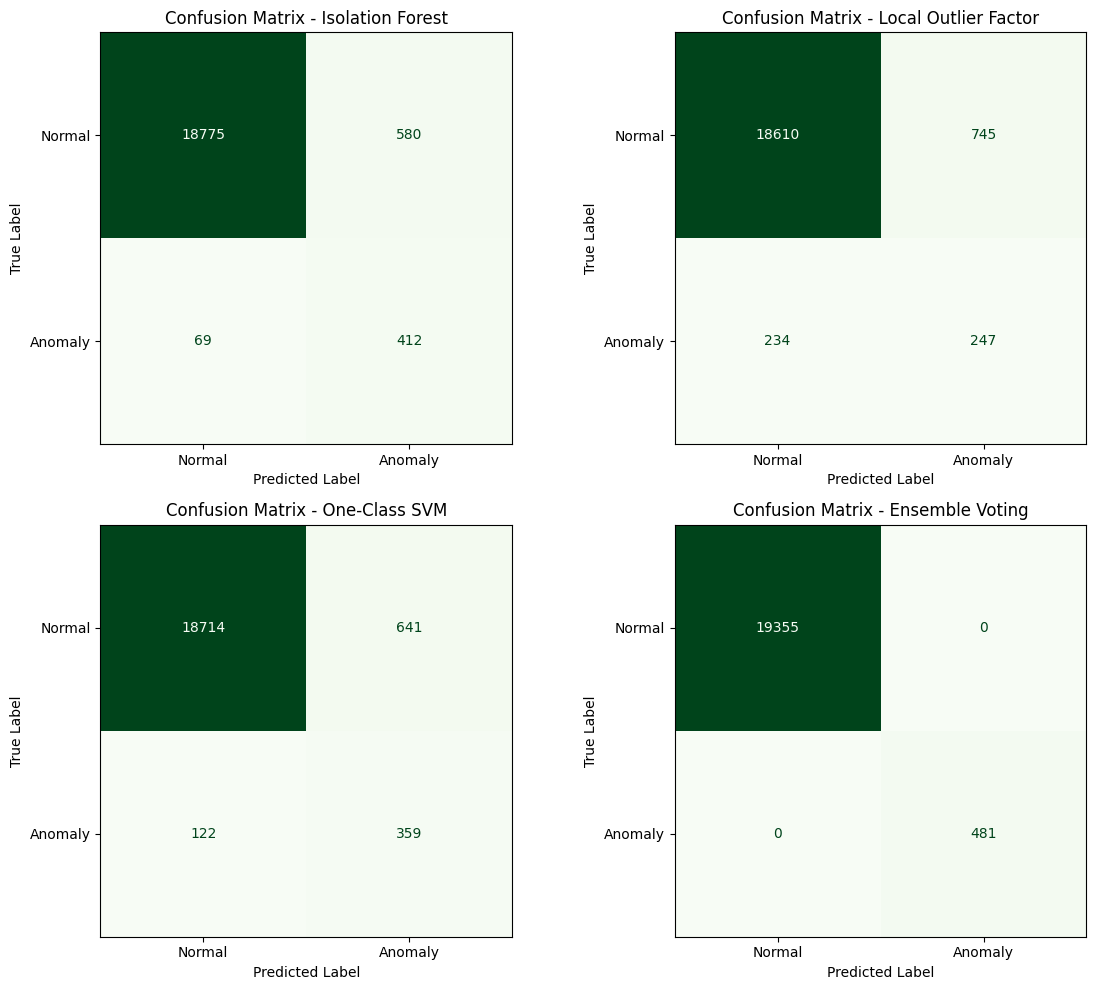

In [ ]:
# Confusion Matrices
models = {
    "Isolation Forest": iso_preds,
    "Local Outlier Factor": lof_preds,
    "One-Class SVM": svm_preds,
    "Ensemble Voting": ensemble_preds
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

for idx, (model_name, preds) in enumerate(models.items()):
    cm = confusion_matrix(ensemble_preds, preds)  # Compare against ensemble voting predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
    disp.plot(ax=axes[idx], colorbar=False, cmap="Greens")  # Use the 'Greens' colormap
    axes[idx].set_title(f"Confusion Matrix - {model_name}")
    axes[idx].set_xlabel("Predicted Label")  # Add labels for clarity
    axes[idx].set_ylabel("True Label")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**VISUALISATION : BAR PLOT TO ANALYSE NORMAL VS ANOMALY IN EACH MODEL**

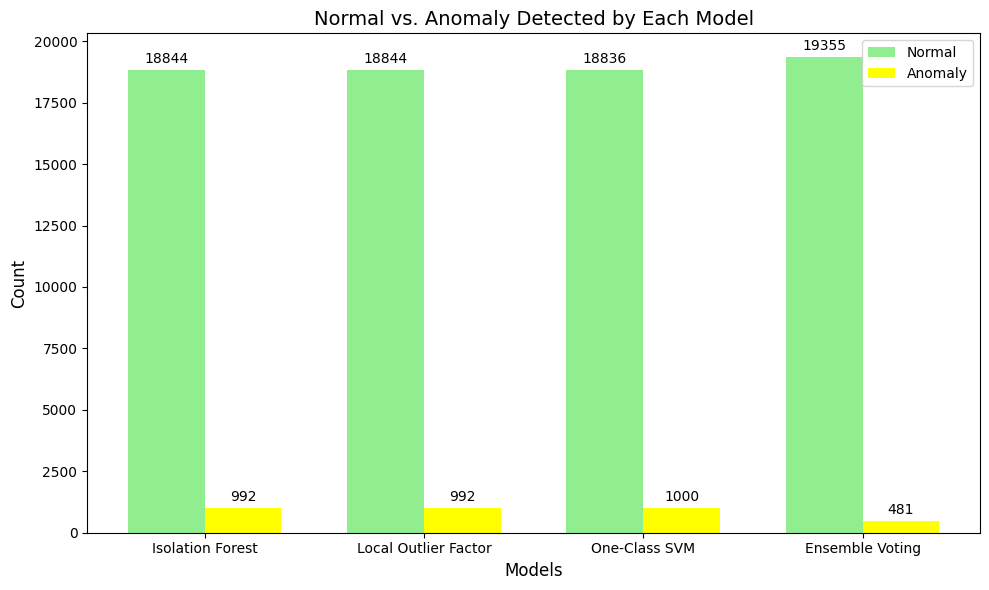

In [ ]:
# Generate data for normal vs. anomaly counts for each model
model_names = ["Isolation Forest", "Local Outlier Factor", "One-Class SVM", "Ensemble Voting"]
normal_counts = [len(iso_preds) - sum(iso_preds), len(lof_preds) - sum(lof_preds),
                 len(svm_preds) - sum(svm_preds), len(ensemble_preds) - sum(ensemble_preds)]
anomaly_counts = [sum(iso_preds), sum(lof_preds), sum(svm_preds), sum(ensemble_preds)]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width / 2, normal_counts, bar_width, label='Normal', color='lightgreen')
bars2 = ax.bar(x + bar_width / 2, anomaly_counts, bar_width, label='Anomaly', color='yellow')

# Add titles and labels
ax.set_title("Normal vs. Anomaly Detected by Each Model", fontsize=14)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=0, fontsize=10)
ax.legend()

# Annotate the bars with counts
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**VISUALISATION : SCATTERPLOT TO DEPICT ANOMALIES IN EACH MODEL.**

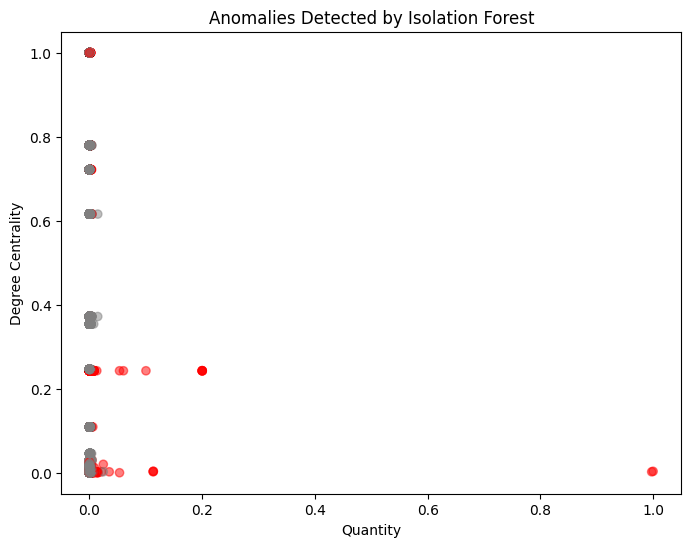

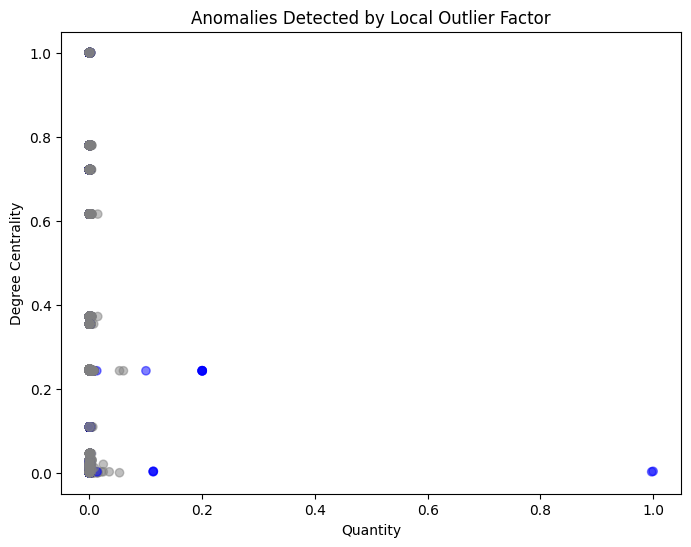

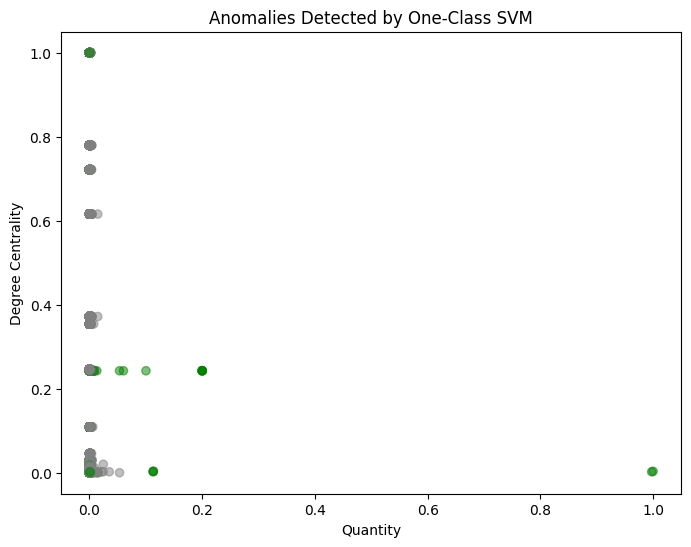

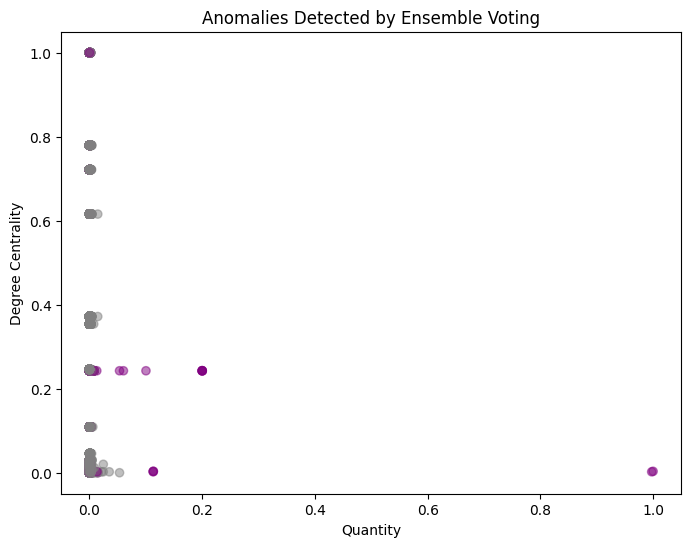

In [ ]:
# Scatter plot of anomalies
colors = {
    "Isolation Forest": 'red',
    "Local Outlier Factor": 'blue',
    "One-Class SVM": 'green',
    "Ensemble Voting": 'purple'
}
for model_name, preds in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colors[model_name] if p == 1 else 'gray' for p in preds], alpha=0.5)
    plt.title(f"Anomalies Detected by {model_name}")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

**COMPUTING METRICS FOR EACH MODEL : F1 SCORE , PRECISION AND RECALL.**

Precision=[TP/(TP+FP)]  

  Recall=[TP/(TP+FN)]
  
  ​F1 Score= [2*(Precision * Recall)/(Precision+Recall)]


In [ ]:
# Metrics for each model
metrics = {}
for model_name, preds in models.items():
    report = classification_report(ensemble_preds, preds, output_dict=True)
    metrics[model_name] = {
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1 Score": report['1']['f1-score']
    }

# Display Metrics
metrics_df = pd.DataFrame(metrics).T
print("\n Metrics :")
print(metrics_df)


 Metrics :
                      Precision    Recall  F1 Score
Isolation Forest       0.415323  0.856549  0.559403
Local Outlier Factor   0.248992  0.513514  0.335370
One-Class SVM          0.359000  0.746362  0.484808
Ensemble Voting        1.000000  1.000000  1.000000


**METRICS EVALUATION AND COMPARISON - BAR/LINE PLOTS.**

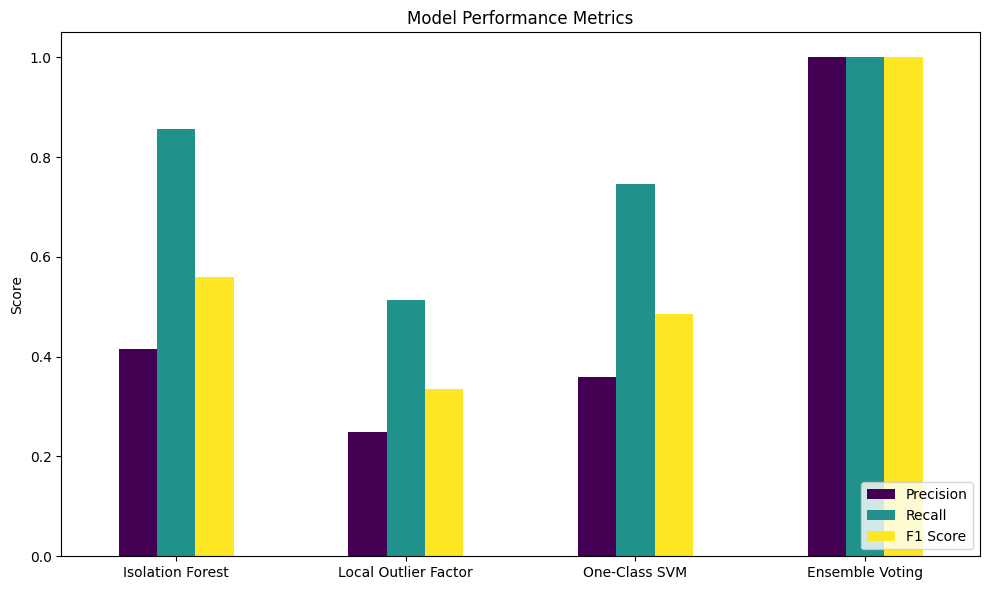

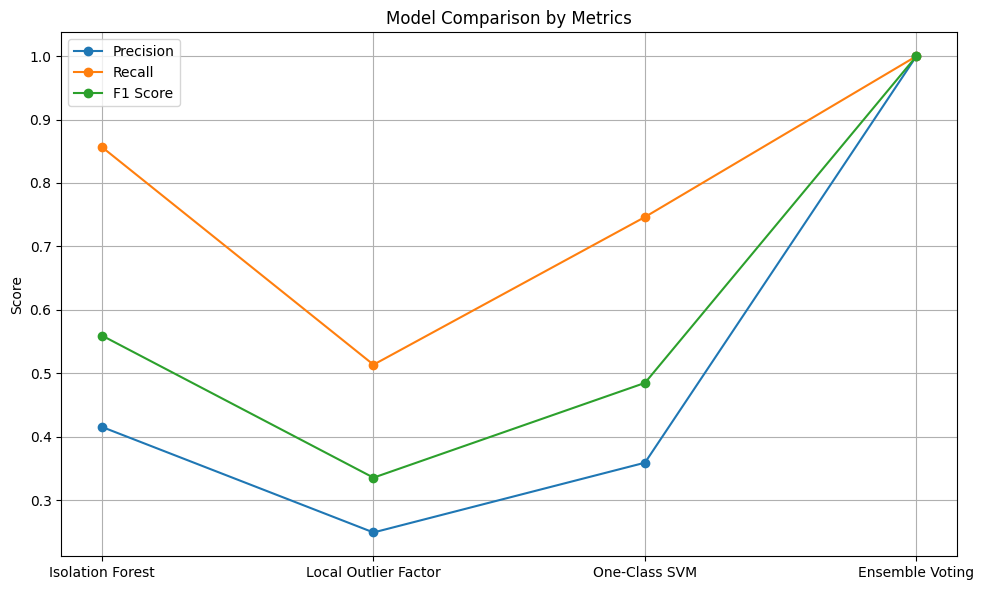

In [ ]:
# Visualizing Metrics
metrics_df.plot(kind='bar', figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
# Comparison Chart between Models
for metric in ["Precision", "Recall", "F1 Score"]:
    metrics_df[metric].plot(kind='line', marker='o', figsize=(10, 6), label=metric)
plt.title("Model Comparison by Metrics")
plt.ylabel("Score")
plt.xticks(range(len(metrics_df.index)), metrics_df.index, rotation=0)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save one class svm model
with open("svm_model.pkl", "wb") as svm_file:
    pickle.dump(one_class_svm, svm_file)

# Save Ensemble model
with open("ensemble_model.pkl", "wb") as ensemble_file:
    pickle.dump(isolation_forest, ensemble_file)
print("Models saved successfully!")

Models saved successfully!


**Insights and Findings**:

**Model Performance:**
* **Isolation Forest:**

High recall (0.856) but lower precision (0.415).
This indicates the model is good at identifying anomalies but generates more false positives.
* **Local Outlier Factor (LOF):**

Struggles with both precision (0.249) and recall (0.513), resulting in a lower F1 score (0.335).
It is less effective in distinguishing anomalies and is prone to misclassification.
* **One-Class SVM:**

Offers a balanced trade-off with precision (0.359) and recall (0.746).
It performs moderately well but still produces a noticeable number of false positives.
* **Ensemble Voting:**

Perfect precision, recall, and F1 score (1.000), as it combines the strengths of individual models.
Effective in reducing both false positives and false negatives.



**GENERAL BUSINESS CONTEXT:**
1. Isolation Forest and One-Class SVM detect anomalies effectively for fraud prevention.  
2. Ensemble Voting ensures top accuracy for critical decisions.  
3. High-recall models aid resource-efficient investigations.  
4. Combining models optimizes anomaly detection workflows.  
5. Accurate detection builds trust and drives business growth.  

## **ARIMA**

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pickle

In [ ]:
df = pd.read_excel('/content/NEAR_token_transaction_data.xlsx')

In [ ]:
df['Quantity'].dropna(inplace = True)
df["Quantity"].drop_duplicates(inplace = True)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime (UTC)'])
df.set_index('DateTime', inplace=True)
df = df.sort_index()

In [ ]:
df.head()

Transaction Hash  \
DateTime                                                                 
2024-01-01 00:25:35  0x27797428fc8aaf088cc707c8788b5d13580696418c79...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:51:59  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...   

                      Blockno  UnixTimestamp      DateTime (UTC)  \
DateTime                                                           
2024-01-01 00:25:35  18909018     1704068735 2024-01-01 00:25:35   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:51:59  18909149     1704070319 2024-01-01 00:51:59   

                                                           From  \
DateTime                                                          
2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                                             To    Quantity  \
DateTime                                                                      
2024-01-01 00:25:35  0x776a0725094cbf984e31b43d17e8aaec3c88294a   36.593837   
2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  104.984275   
2024-01-01 00:36:11  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.079035   
2024-01-01 00:36:11  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  104.984275   
2024-01-01 00:51:59  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   10.247435   

                              Method  
DateTime                              
2024-01-01 00:25:35  Sell To Uniswap  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:51:59       0x415565b0

In [ ]:
target = df['Quantity'].resample('D').sum()

train_data = target[:-30]
test_data = target[-30:]

print(len(train_data))
print(len(test_data))

147
30


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(train_data)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] <= 0.05:
  print("Reject the null hypothesis (H0). The time series is stationary.")
else:
  print("Fail to reject the null hypothesis (H0). The time series is not stationary.")

ADF Statistic: -4.43115581683401
p-value: 0.0002613314766798959
Reject the null hypothesis (H0). The time series is stationary.


In [ ]:
#Bollinger Bands
rolling_mean = target.rolling(window=20).mean()
rolling_std = target.rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

**Using manual values of p,d,q as (5,1,3)**

In [ ]:
arima = ARIMA(train_data, order=(5,1,3))
manual_model_fit = arima.fit()
print(manual_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  147
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -1765.273
Date:                Wed, 29 Jan 2025   AIC                           3548.547
Time:                        13:50:45   BIC                           3575.399
Sample:                    01-01-2024   HQIC                          3559.457
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8637      1.135      0.761      0.447      -1.361       3.088
ar.L2         -0.6580      1.030     -0.639      0.523      -2.676       1.360
ar.L3         -0.1207      0.413     -0.292      0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = manual_model_fit.forecast(steps=len(test_data))
print(forecast)

2024-05-27      410.998569
2024-05-28    22892.257943
2024-05-29    77022.569428
2024-05-30    92589.573648
2024-05-31    66585.859330
2024-06-01    43526.667361
2024-06-02    58998.871740
2024-06-03    82869.753307
2024-06-04    78882.837360
2024-06-05    53966.072675
2024-06-06    46362.635270
2024-06-07    63974.637745
2024-06-08    78427.673506
2024-06-09    69146.308951
2024-06-10    52871.872187
2024-06-11    53993.400139
2024-06-12    68859.894820
2024-06-13    74246.136808
2024-06-14    63640.407830
2024-06-15    54336.285691
2024-06-16    59606.406466
2024-06-17    69962.176033
2024-06-18    69818.565932
2024-06-19    60703.538754
2024-06-20    56917.444212
2024-06-21    63241.997683
2024-06-22    69270.356242
2024-06-23    66339.062738
2024-06-24    59819.790023
2024-06-25    59575.255496
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
forecast.shape

(30,)

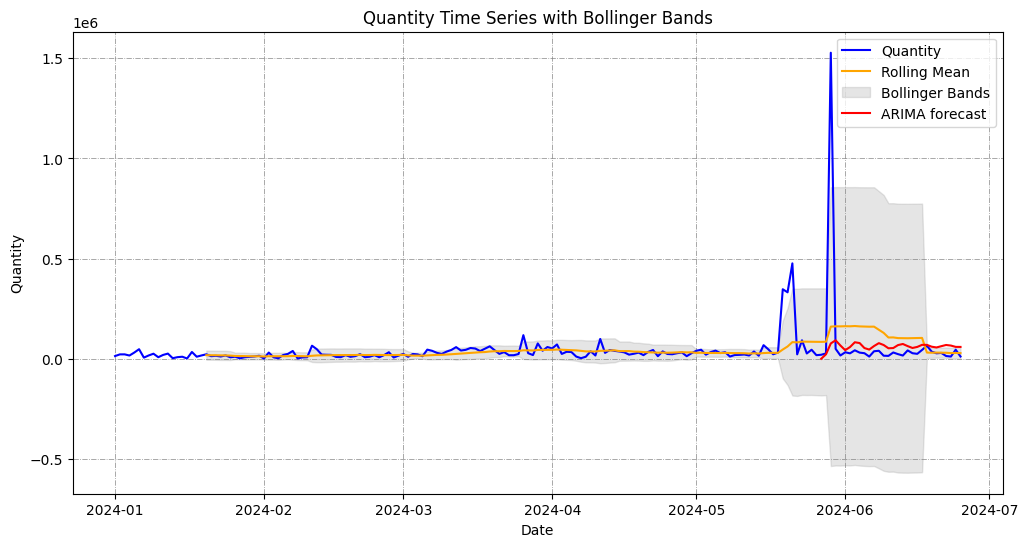

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(target, label = 'Quantity', color = 'blue')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'orange')
plt.fill_between(target.index, upper_band, lower_band, color = 'grey', alpha = 0.2,label='Bollinger Bands')
plt.plot(forecast, label = 'ARIMA forecast', color = 'red')
plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)
plt.show()

**Using AutoARIMA to determine the values of p, d, and q.**

In [ ]:
auto_model = auto_arima(
    train_data,
    seasonal=False,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3559.782, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3592.855, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3576.171, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3577.191, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3590.858, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3573.952, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3573.851, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3549.679, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3551.441, Time=2.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3555.235, Time=2.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3552.967, Time=0.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3555.207, Time=5.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3546.389, Time=1.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3550.840, Time=1.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3546.490, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3547.482, Time=2.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=3545.890, Time=2.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3543.900, Time=1.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3542.433, Time=1.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3541.076, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3572.877, Time=1.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0]             : AIC=3542.605, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3571.955, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3544.093, Time=0.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3549.764, Time=0.60 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 39.082 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1766.538
Date:                Wed, 29 Jan 2025   AIC                           3541.076
Time:                        13:51:27   BIC                           3553.010
Sample:                    01-01-2024   HQIC                          3545.925
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4198      0.051     -8.224      0.000      -0.520

In [ ]:
print(auto_model.order)

(0, 1, 3)


In [ ]:
arima = ARIMA(train_data, order=auto_model.order)
auto_model_fit = arima.fit()
print(auto_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  147
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1766.538
Date:                Wed, 29 Jan 2025   AIC                           3541.076
Time:                        13:51:27   BIC                           3553.010
Sample:                    01-01-2024   HQIC                          3545.925
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4198      0.051     -8.224      0.000      -0.520      -0.320
ma.L2       -7.22e-05      0.046     -0.002      0.999      -0.090       0.090
ma.L3         -0.5060      0.040    -12.671      0.0

In [ ]:
forecast = auto_model_fit.forecast(steps=len(test_data))
print(forecast)

2024-05-27     9082.655614
2024-05-28    42507.864058
2024-05-29    60970.183602
2024-05-30    60970.183602
2024-05-31    60970.183602
2024-06-01    60970.183602
2024-06-02    60970.183602
2024-06-03    60970.183602
2024-06-04    60970.183602
2024-06-05    60970.183602
2024-06-06    60970.183602
2024-06-07    60970.183602
2024-06-08    60970.183602
2024-06-09    60970.183602
2024-06-10    60970.183602
2024-06-11    60970.183602
2024-06-12    60970.183602
2024-06-13    60970.183602
2024-06-14    60970.183602
2024-06-15    60970.183602
2024-06-16    60970.183602
2024-06-17    60970.183602
2024-06-18    60970.183602
2024-06-19    60970.183602
2024-06-20    60970.183602
2024-06-21    60970.183602
2024-06-22    60970.183602
2024-06-23    60970.183602
2024-06-24    60970.183602
2024-06-25    60970.183602
Freq: D, Name: predicted_mean, dtype: float64


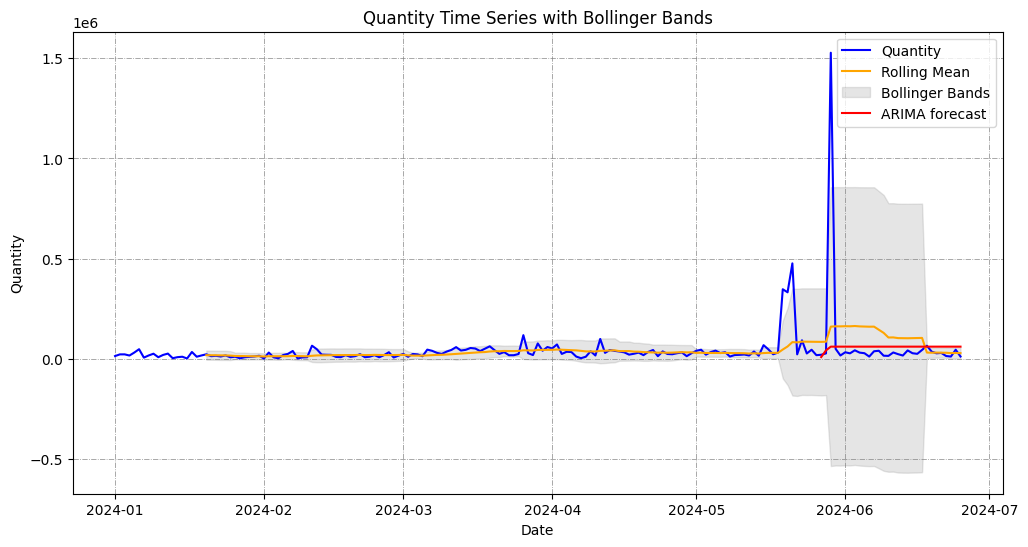

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(target, label = 'Quantity', color = 'blue')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'orange')
plt.fill_between(target.index, upper_band, lower_band, color = 'grey', alpha = 0.2,label='Bollinger Bands')
plt.plot(forecast, label = 'ARIMA forecast', color = 'red')
plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)
plt.show()

**Hyper Parameter Tuning of ARIMA**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import root_mean_squared_error

In [ ]:
def objective(trial):
    # Suggesting hyperparameters for ARIMA
    p = trial.suggest_int('p', 0, 5)
    d = trial.suggest_int('d', 0, 1)
    q = trial.suggest_int('q', 0, 3)

    try:
        # Training ARIMA model
        model = ARIMA(train_data, order=(p, d, q),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
        model_fit = model.fit(method_kwargs={"maxiter": 500})

        # Make predictions
        predictions = model_fit.forecast(steps=len(test_data))
        error = root_mean_squared_error(test_data, predictions)
        return error
    except Exception as e:
        print(f"Error with (p,d,q)=({p},{d},{q}): {e}")
        return float('inf')

# Create Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best hyperparameters and score
print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-01-29 13:52:03,129] A new study created in memory with name: no-name-e8018997-9283-46cd-ad1f-9a193beceb8d
[I 2025-01-29 13:52:04,748] Trial 0 finished with value: 271762.64374962077 and parameters: {'p': 1, 'd': 0, 'q': 3}. Best is trial 0 with value: 271762.64374962077.
[I 2025-01-29 13:52:04,905] Trial 1 finished with value: 272828.02252855216 and parameters: {'p': 0, 'd': 0, 'q': 0}. Best is trial 0 with value: 271762.64374962077.
[I 2025-01-29 13:52:07,728] Trial 2 finished with value: 262489.0550826339 and parameters: {'p': 5, 'd': 1, 'q': 3}. Best is trial 2 with value: 262489.0550826339.
[I 2025-01-29 13:52:08,076] Trial 3 finished with value: 269881.4846446443 and parameters: {'p': 2, 'd': 1, 'q': 1}. Best is trial 2 with value: 262489.0550826339.
[I 2025-01-29 13:52:08,931] Trial 4 finished with value: 268290.618044467 and parameters: {'p': 3, 'd': 1, 'q': 3}. Best is trial 2 with value: 262489.0550826339.
[I 2025-01-29 13:52:09,123] Trial 5 finished with value: 272774

Best parameters: {'p': 5, 'd': 1, 'q': 3}
Best RMSE: 262489.0550826339


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


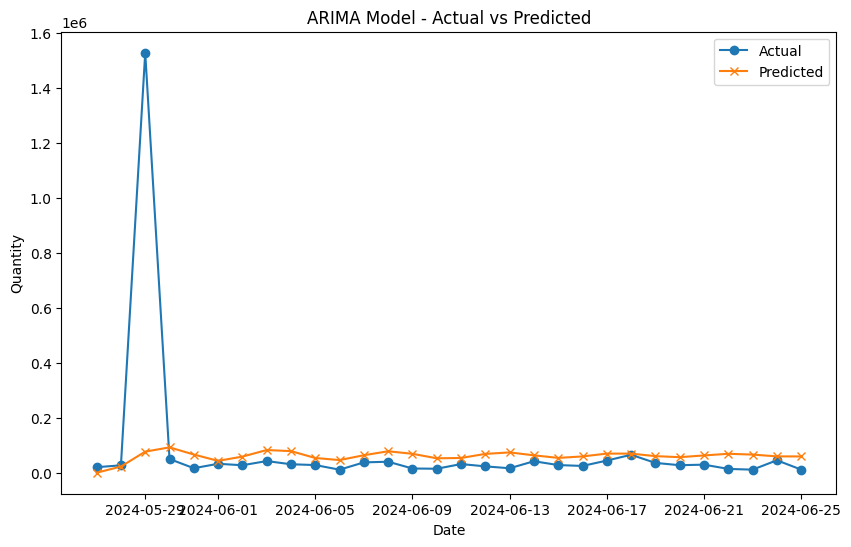

In [ ]:
test_data_series = pd.Series(test_data, index=target[-30:].index)

# Generating predictions
model = ARIMA(train_data, order=(5, 1, 3))
optuna_model_fit = model.fit()

predictions = optuna_model_fit.forecast(steps=len(test_data))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test_data_series.index, test_data, label='Actual', marker='o')
plt.plot(test_data_series.index, predictions, label='Predicted', marker='x')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [ ]:
print(predictions)

2024-05-27      410.998569
2024-05-28    22892.257943
2024-05-29    77022.569428
2024-05-30    92589.573648
2024-05-31    66585.859330
2024-06-01    43526.667361
2024-06-02    58998.871740
2024-06-03    82869.753307
2024-06-04    78882.837360
2024-06-05    53966.072675
2024-06-06    46362.635270
2024-06-07    63974.637745
2024-06-08    78427.673506
2024-06-09    69146.308951
2024-06-10    52871.872187
2024-06-11    53993.400139
2024-06-12    68859.894820
2024-06-13    74246.136808
2024-06-14    63640.407830
2024-06-15    54336.285691
2024-06-16    59606.406466
2024-06-17    69962.176033
2024-06-18    69818.565932
2024-06-19    60703.538754
2024-06-20    56917.444212
2024-06-21    63241.997683
2024-06-22    69270.356242
2024-06-23    66339.062738
2024-06-24    59819.790023
2024-06-25    59575.255496
Freq: D, Name: predicted_mean, dtype: float64


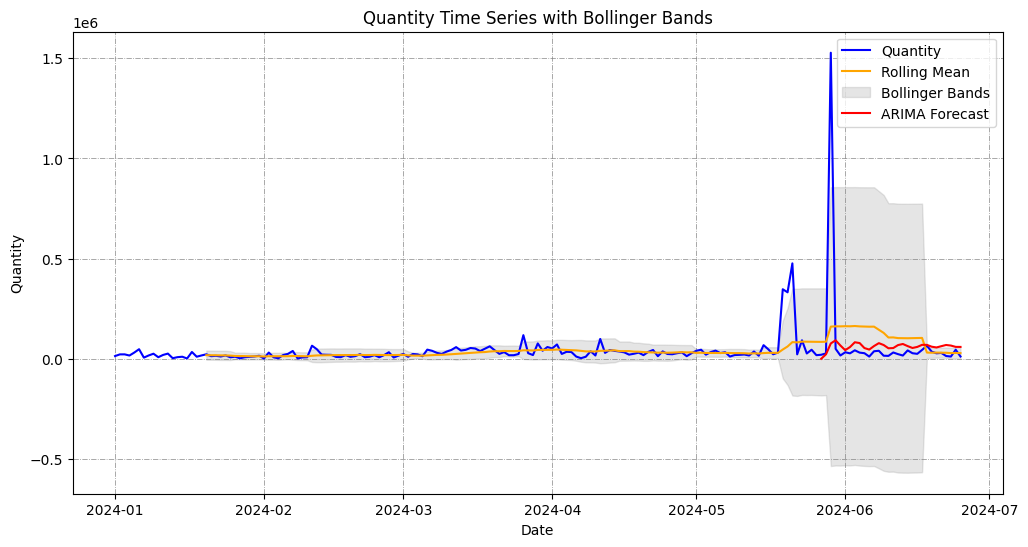

In [ ]:
plt.figure(figsize=(12, 6))

predictions_series = pd.Series(predictions, index=target[-30:].index)

plt.plot(target, label='Quantity', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.fill_between(target.index, upper_band, lower_band, color='grey', alpha=0.2, label='Bollinger Bands')
plt.plot(predictions_series, label='ARIMA Forecast', color='red')

plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)

plt.show()


In [ ]:
with open("arima_model.pkl", "wb") as f:
    pickle.dump(optuna_model_fit, f)
print("Model saved using pickle!")

Model saved using pickle!


LSTM


In [ ]:
import pandas as pd
data = pd.read_excel("NEAR_token_transaction_data.xlsx")
print(data.head())

                                    Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  18909149     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To    Quantity           Method  
0  0x776a0725094cbf98

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 3.4056e-04 - val_loss: 0.0136
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 2.1051e-04 - val_loss: 0.0135
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.9130e-04 - val_loss: 0.0142
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4733e-04 - val_loss: 0.0144
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.4338e-04 - val_loss: 0.0140
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4372e-04 - val_loss: 0.0136
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.7827e-04 - val_loss: 0.0138
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


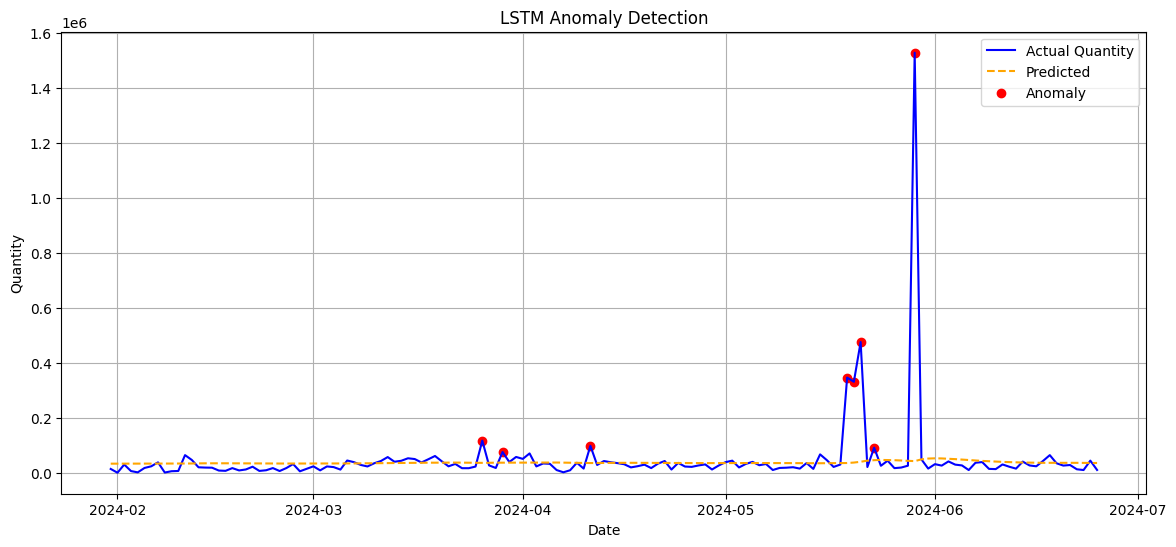

Anomalies detected: 8
Threshold MSE: 0.0006
                Quantity       MSE
DateTime                          
2024-03-26  1.183108e+05  0.002800
2024-03-29  7.702208e+04  0.000651
2024-04-11  9.943840e+04  0.001679
2024-05-19  3.473122e+05  0.041385
2024-05-20  3.321134e+05  0.036999
2024-05-21  4.764014e+05  0.081257
2024-05-23  9.270121e+04  0.000883
2024-05-29  1.527231e+06  0.945535
LSTM model saved as lstm_anomaly_detector.h5


In [ ]:
# -*- coding: utf-8 -*-
"""LSTM Anomaly Detection"""

# LSTM Implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load and prepare data
lstm_df = data[['DateTime (UTC)', 'Quantity']].copy()
lstm_df['DateTime'] = pd.to_datetime(lstm_df['DateTime (UTC)'])
lstm_df.set_index('DateTime', inplace=True)
daily_quantity = lstm_df['Quantity'].resample('D').sum().to_frame()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_quantity)

# Create sequences for LSTM
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Train-test split (maintain temporal order)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Generate predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Combine predictions
all_pred = np.concatenate([train_pred, test_pred])

# Calculate reconstruction error
mse = np.mean(np.square(all_pred - scaled_data[window_size:]), axis=1)

# Detect anomalies (using 95th percentile as threshold)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

# Create results dataframe
results = daily_quantity.iloc[window_size:].copy()
results['Predicted'] = scaler.inverse_transform(all_pred)
results['MSE'] = mse
results['Anomaly'] = anomalies

# Visualization
plt.figure(figsize=(14, 6))
plt.plot(results.index, results['Quantity'], label='Actual Quantity', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='orange', linestyle='--')
plt.scatter(results[results['Anomaly']].index,
           results[results['Anomaly']]['Quantity'],
           color='red', label='Anomaly')
plt.title('LSTM Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly statistics
print(f"Anomalies detected: {sum(anomalies)}")
print(f"Threshold MSE: {threshold:.4f}")
print(results[results['Anomaly']][['Quantity', 'MSE']])

# Save model
model.save('lstm_anomaly_detector.h5')
print("LSTM model saved as lstm_anomaly_detector.h5")

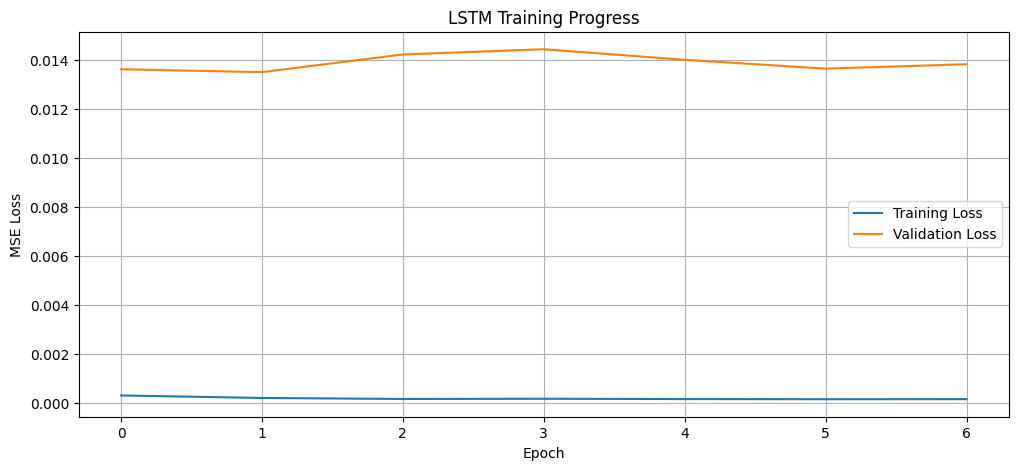

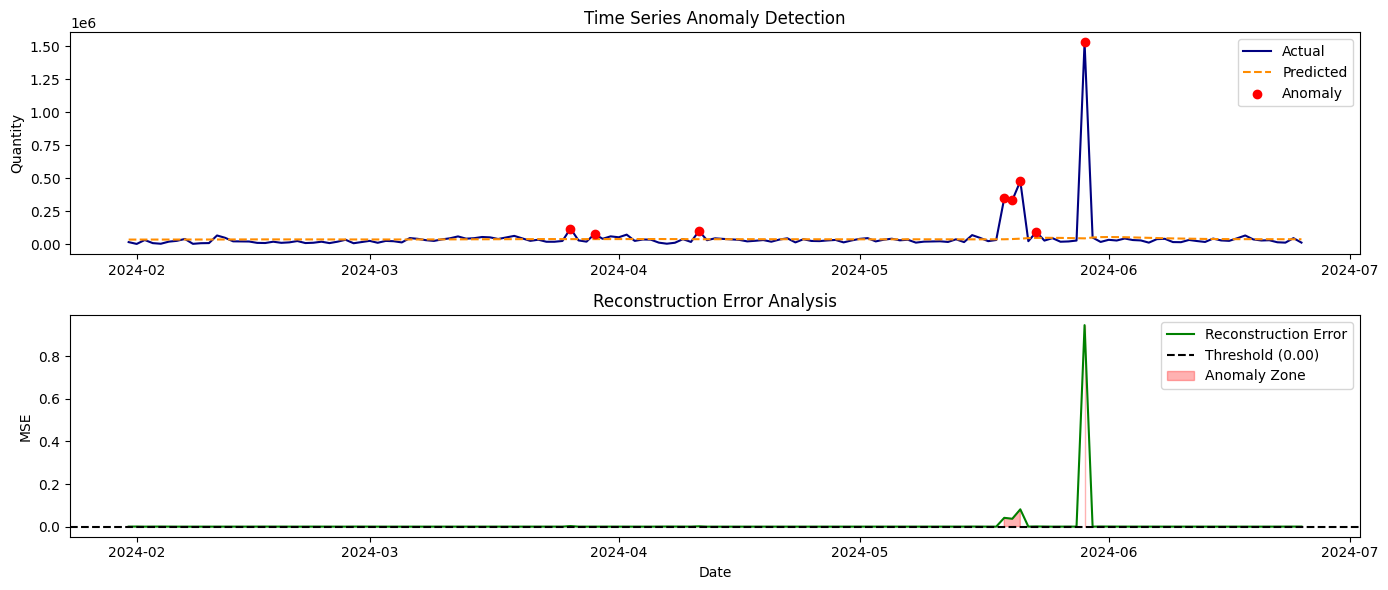

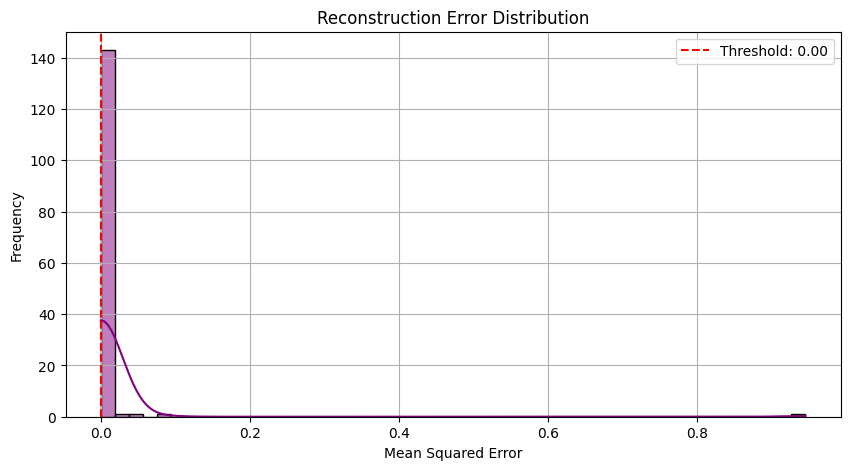

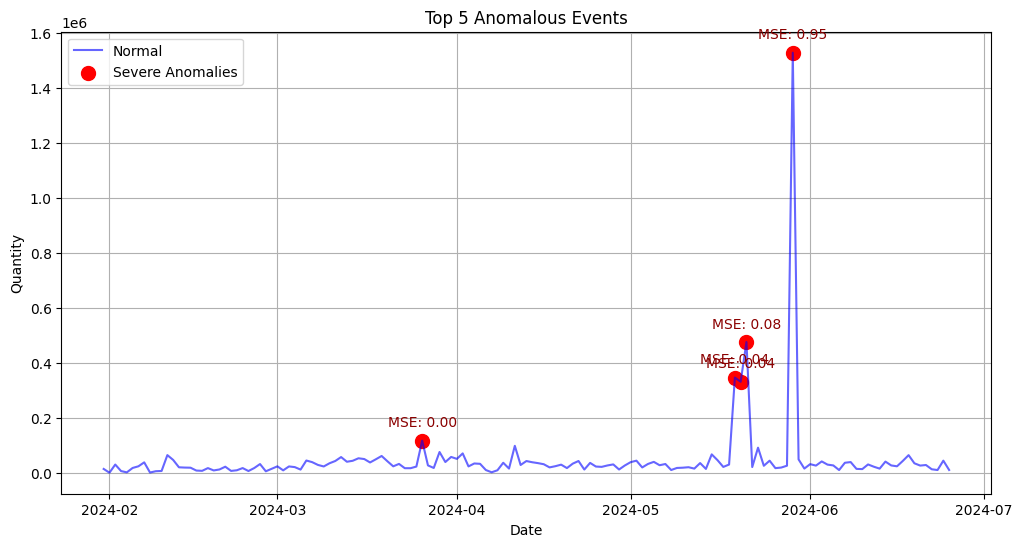

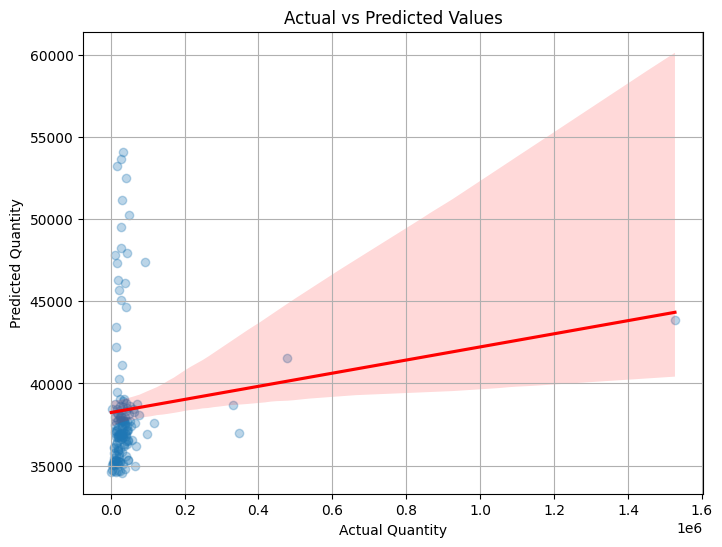

In [ ]:
# Additional Visualizations
import seaborn as sns

# 1. Training Progress Visualization
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Progress')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# 2. Error Distribution & Threshold Visualization
plt.figure(figsize=(14, 6))

# Subplot 1: Actual vs Predicted with Anomalies
plt.subplot(2, 1, 1)
plt.plot(results.index, results['Quantity'], label='Actual', color='navy')
plt.plot(results.index, results['Predicted'], label='Predicted', color='darkorange', linestyle='--')
plt.scatter(results[results['Anomaly']].index,
           results[results['Anomaly']]['Quantity'],
           color='red', label='Anomaly', zorder=5)
plt.title('Time Series Anomaly Detection')
plt.ylabel('Quantity')
plt.legend()

# Subplot 2: MSE Errors with Threshold
plt.subplot(2, 1, 2)
plt.plot(results.index, results['MSE'], label='Reconstruction Error', color='green')
plt.axhline(threshold, color='black', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.fill_between(results.index, results['MSE'], threshold,
                 where=(results['MSE'] > threshold),
                 color='red', alpha=0.3, label='Anomaly Zone')
plt.title('Reconstruction Error Analysis')
plt.ylabel('MSE')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Error Distribution Histogram
plt.figure(figsize=(10, 5))
sns.histplot(results['MSE'], bins=50, kde=True, color='purple')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 4. Zoomed Anomaly Inspection (Top 5 Anomalies)
top_anomalies = results.nlargest(5, 'MSE')
plt.figure(figsize=(12, 6))
plt.plot(results['Quantity'], label='Normal', color='blue', alpha=0.6)
plt.scatter(top_anomalies.index, top_anomalies['Quantity'],
            color='red', s=100, label='Severe Anomalies')
plt.title('Top 5 Anomalous Events')
plt.ylabel('Quantity')
plt.xlabel('Date')

# Add annotations
for idx, row in top_anomalies.iterrows():
    plt.annotate(f"MSE: {row['MSE']:.2f}",
                 (idx, row['Quantity']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 color='darkred')

plt.legend()
plt.grid(True)
plt.show()

# 5. Prediction vs Actual Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=results['Quantity'], y=results['Predicted'],
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.grid(True)
plt.show()

# **Local Outlier Factor (LOF)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import networkx as nx  # Import networkx

# Task 1: Clean and preprocess the dataset
# Scale numerical features and encode categorical variables

def preprocess_data(data):
    # Select numerical features
    numerical_features = ['Quantity','Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality','Blockno']
    scaler = MinMaxScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    # Select categorical features
    categorical_features = ['From', 'To', 'Method']
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_categories = encoder.fit_transform(data[categorical_features])
    encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_features))

    # Combine numerical and encoded categorical features
    preprocessed_data = pd.concat([data[numerical_features], encoded_df], axis=1)
    return preprocessed_data

In [ ]:
# Task 2: Feature selection and/or creation
def create_features(data):
    # Calculate and add 'Betweenness Centrality' if it's not present
    if not all(col in data.columns for col in ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']):
        # Create a directed graph from the transaction data
        G = nx.DiGraph()
        edges = data[['From', 'To', 'Quantity']].values
        G.add_weighted_edges_from(edges)
        # Compute centrality metrics
        betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
        # Add these features to the original dataset
        data['Betweenness Centrality'] = data['From'].map(betweenness_centrality)
        # Add other centrality metrics if they are not present
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        data['Degree Centrality'] = data['From'].map(degree_centrality)
        data['Closeness Centrality'] = data['From'].map(closeness_centrality)

    # Calculate TransactionFrequency and TransactionAmountRatio
    data['TransactionFrequency'] = data.groupby('From')['Quantity'].transform('count') # Fixed: Use 'Quantity' for count
    data['TransactionAmountRatio'] = data['Quantity'] / data.groupby('From')['Quantity'].transform('sum')
    return data

# Create features before preprocessing
data_with_features = create_features(data)

# Preprocess the data after feature creation
preprocessed_data = preprocess_data(data_with_features)

In [ ]:
from IPython.display import display
# Create features before preprocessing
data_with_features = create_features(data)

# Preprocess the data after feature creation
preprocessed_data = preprocess_data(data_with_features)

# Display the first few rows of the updated data
display(data.head())

Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  0.000000     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  0.000041     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  0.000041     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  0.000041     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  0.000104     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To      Quantity           Method  \
0  0x776a0725094cbf984e31b43d17e8aaec3c88294a  4.879178e-05  Sell To Uniswap   
1  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  1.399790e-04       0x415565b0   
2  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0  1.053794e-07       0x415565b0   
3  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  1.399790e-04       0x415565b0   
4  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  1.366325e-05       0x415565b0   

   Betweenness Centrality  Degree Centrality  Closeness Centrality  \
0                1.000000           1.000000              1.000000   
1                0.051332           0.113936              0.906074   
2                0.051332           0.113936              0.906074   
3                0.450616           0.778719              0.891285   
4                0.051332           0.113936              0.906074   

   TransactionFrequency  TransactionAmountRatio  
0                  2425            1.778927e-04  
1                  3575            1.650612e-04  
2                  3575            1.242619e-07  
3                  1656            3.391440e-04  
4                  3575            1.611150e-05

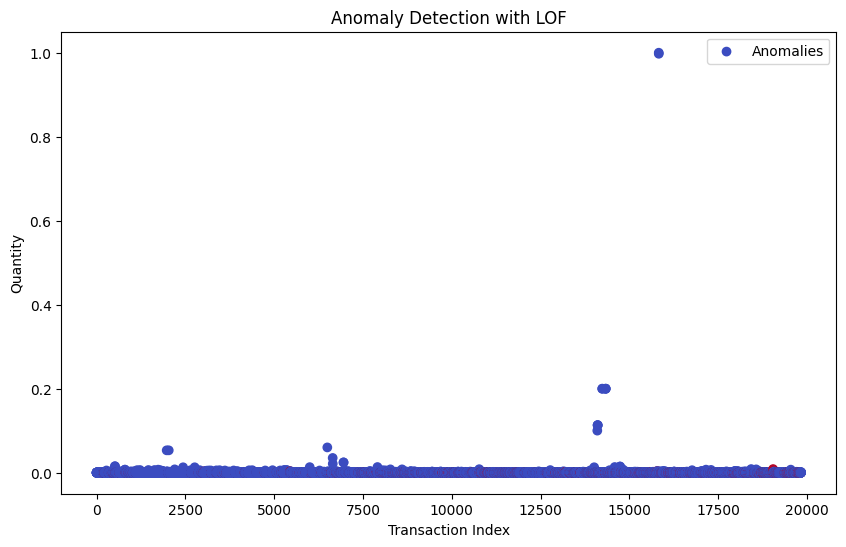

In [ ]:
# Task 3: Initialize and train the Local Outlier Factor (LOF) model
import numpy as np
# Select relevant features for LOF
relevant_features = preprocessed_data.columns
X = preprocessed_data[relevant_features]

# Train the LOF model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
preprocessed_data['AnomalyScore'] = lof_model.fit_predict(X)
preprocessed_data['AnomalyScore'] = np.where(preprocessed_data['AnomalyScore'] == -1, 1, 0)  # 1 for anomaly, 0 for normal
import os

# Before saving the file, create the directory if it doesn't exist:
os.makedirs('/content/data', exist_ok=True)

# Save the results to a CSV file
preprocessed_data.to_csv('/content/data/lof_anomaly_detection_results.csv', index=False)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(preprocessed_data.index, preprocessed_data['Quantity'], c=preprocessed_data['AnomalyScore'], cmap='coolwarm', label='Anomalies')
plt.title('Anomaly Detection with LOF')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.savefig('/content/data/lof_anomaly_detection_visualization.png')
plt.show()

In [ ]:
# Step 1: Select relevant features



X = data[['Quantity']].copy()

# Step 2: Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # 10% of data as anomalies
y_pred = lof.fit_predict(X_scaled)

# Add the LOF scores and labels to the dataset
data['LOF_Score'] = lof.negative_outlier_factor_
data['Outlier_Label'] = y_pred  # -1 = anomalous, 1 = normal

# Step 4: Display anomalies
anomalies = data[data['Outlier_Label'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")
anomalies


Number of anomalies detected: 1983


Transaction Hash   Blockno  \
15     0xc6345ad2ad66de57317228d943b8f2cc8bb248f29c2e...  0.002513   
16     0xc6345ad2ad66de57317228d943b8f2cc8bb248f29c2e...  0.002513   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  0.002891   
36     0x95910d734c548e7c25071c772461712be8093bec9014...  0.003452   
46     0xc31ccac2c0d0f978e761d4aaa8e26ab58a460cceeb23...  0.004251   
...                                                  ...       ...   
19779  0x1c98a86dd290182dfffc86d3f714bb3b067cda74a57a...  0.997783   
19796  0x36752947a59371c2e7445d74fc9d69be00b1151dc39e...  0.998517   
19797  0x36752947a59371c2e7445d74fc9d69be00b1151dc39e...  0.998517   
19818  0x4a613ed0b5baae590ca416aa3f280167aa0ccf7b6b12...  0.999624   
19833  0x37dfd226ef55d464641ec94fc675ad3692d9af347132...  1.000000   

       UnixTimestamp      DateTime (UTC)  \
15        1704107327 2024-01-01 11:08:47   
16        1704107327 2024-01-01 11:08:47   
26        1704113195 2024-01-01 12:46:35   
36        1704121787 2024-01-01 15:09:47   
46        1704133967 2024-01-01 18:32:47   
...              ...                 ...   
19779     1719322919 2024-06-25 13:41:59   
19796     1719334067 2024-06-25 16:47:47   
19797     1719334067 2024-06-25 16:47:47   
19818     1719350963 2024-06-25 21:29:23   
19833     1719356675 2024-06-25 23:04:35   

                                             From  \
15     0xbd49e0f383f501001d97358b8e4f8dca788fa41a   
16     0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
36     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
46     0x6469b34a2a4723163c4902dbbdea728d20693c12   
...                                           ...   
19779  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
19796  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19797  0x1111111254eeb25477b68fb85ed929f73a960582   
19818  0x5f515f6c524b18ca30f7783fb58dd4be2e9904ec   
19833  0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5   

                                               To      Quantity  \
15     0x22f9dcf4647084d6c31b2765f6910cd85c178c18  2.659786e-05   
16     0x6469b34a2a4723163c4902dbbdea728d20693c12  2.659786e-05   
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  9.350457e-04   
36     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0  2.229084e-09   
46     0x1c742eed25fdd98588de2263b0914565fb4d7d04  1.336037e-04   
...                                           ...           ...   
19779  0x9d8c87be2e2109817e9a754435a42ad646c69d6b  1.841111e-05   
19796  0x1111111254eeb25477b68fb85ed929f73a960582  2.340943e-05   
19797  0x4a41f0e8560fa6b2d4737bc62db7fd9a250e182a  2.340943e-05   
19818  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  3.781253e-04   
19833  0x28104d4f703ee5b5011cefe106f54efd56f33f95  1.597822e-03   

                Method  Betweenness Centrality  Degree Centrality  \
15          0x415565b0                0.000000           0.000000   
16          0x415565b0                0.450616           0.778719   
26                   -                0.051332           0.113936   
36          0x415565b0                0.051332           0.113936   
46     Sell To Uniswap                1.000000           1.000000   
...                ...                     ...                ...   
19779       0x415565b0                0.450616           0.778719   
19796             Swap                0.305917           0.346516   
19797             Swap                0.179253           0.520716   
19818             Swap                0.000000           0.015066   
19833     Swap Compact                0.000344           0.000942   

       Closeness Centrality  TransactionFrequency  TransactionAmountRatio  \
15                 0.000000                     1            1.000000e+00   
16                 0.891285                  1656            6.444183e-05   
26                 0.906074                  3575            1.102592e-03   
36                 0.906074                  3575            2.628504e-09   
46            

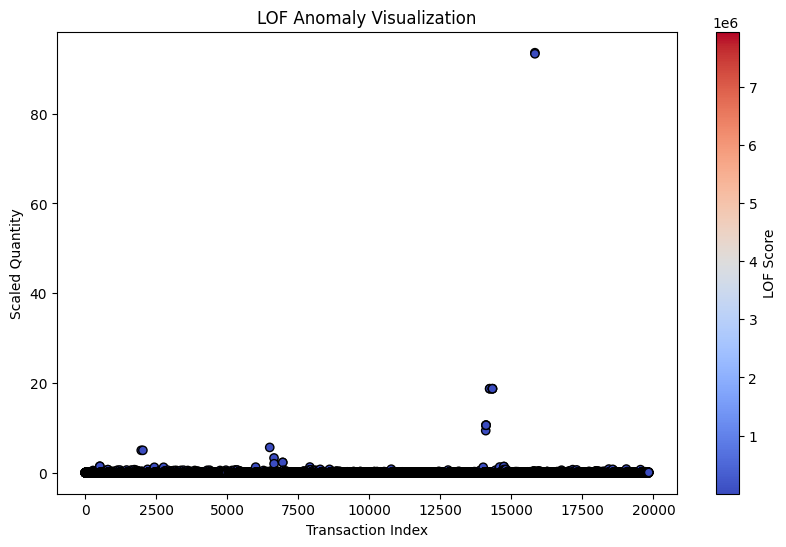

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #Import StandardScaler


# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Calculate LOF scores
lof_model.fit(X_scaled)  # Fit the model to your data before getting outlier scores
lof_scores = -lof_model.negative_outlier_factor_  # Get LOF scores


# Now you can plot - Scatter plot of transaction index vs scaled quantity colored by LOF Score
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=lof_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label="LOF Score")
plt.title("LOF Anomaly Visualization")
plt.xlabel("Transaction Index")
plt.ylabel("Scaled Quantity")
plt.show()

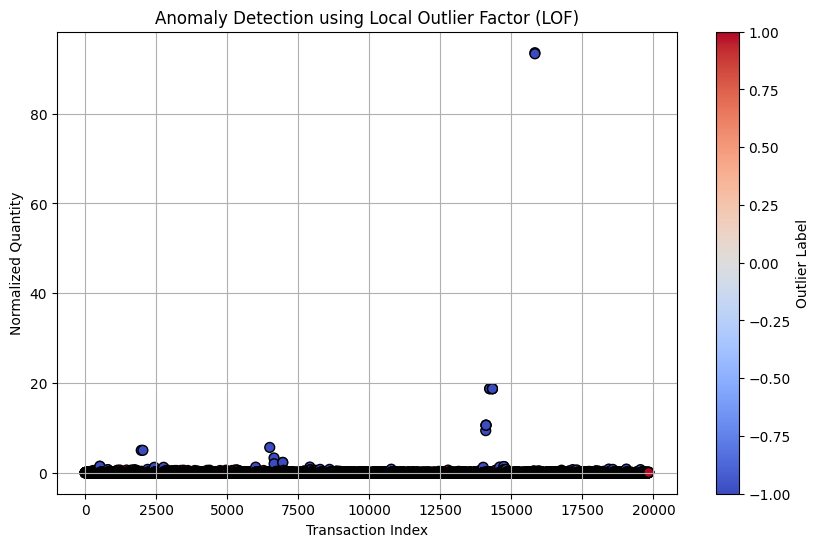

In [ ]:
import matplotlib.pyplot as plt

# Prepare the data for visualization
X['Outlier_Label'] = y_pred  # Add labels for normal (1) and anomalous (-1)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=y_pred, cmap='coolwarm', edgecolor='k', s=50)

# Highlight anomalies
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Transaction Index')
plt.ylabel('Normalized Quantity')
plt.colorbar(label='Outlier Label')
plt.grid(True)
plt.show()


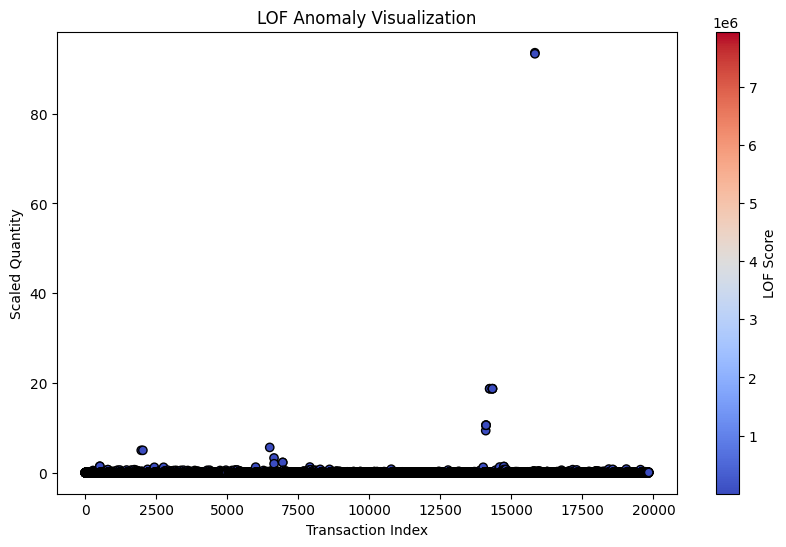

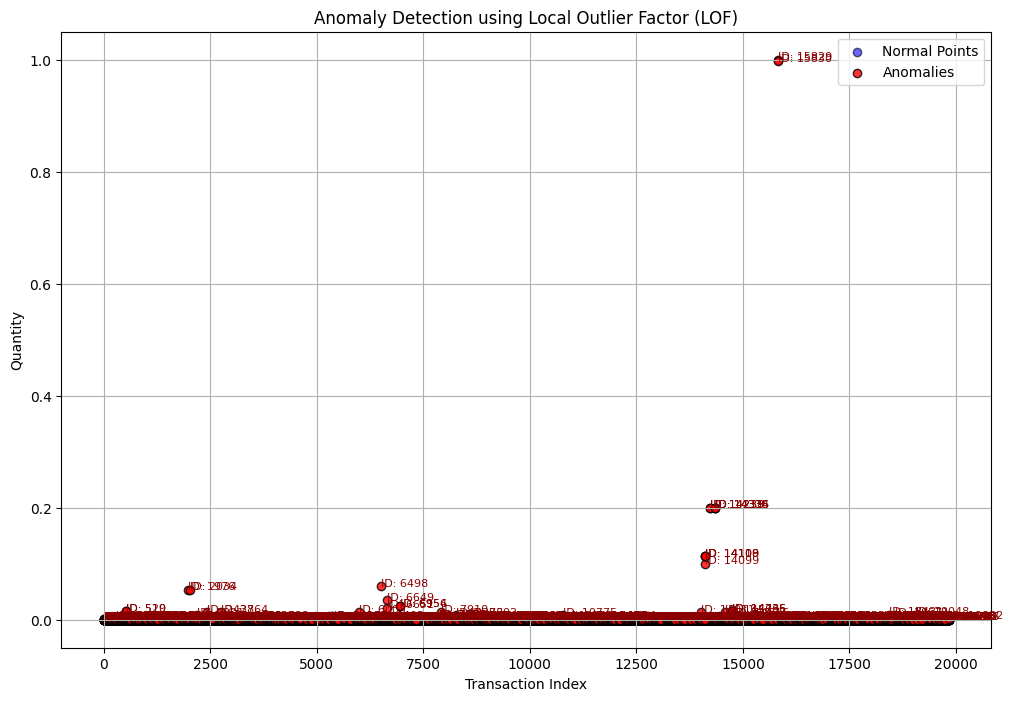

In [ ]:
# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Calculate LOF scores
lof_model.fit(X_scaled)  # Fit the model to your data before getting outlier scores
lof_scores = -lof_model.negative_outlier_factor_  # Get LOF scores

# Add LOF labels to the dataset
y_pred = lof_model.fit_predict(X_scaled)
data['Outlier_Label'] = y_pred  # -1 = anomalous, 1 = normal

# Now you can plot - Scatter plot of transaction index vs scaled quantity colored by LOF Score
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=lof_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label="LOF Score")
plt.title("LOF Anomaly Visualization")
plt.xlabel("Transaction Index")
plt.ylabel("Scaled Quantity")
plt.show()


# Prepare the data for visualization
data['Index'] = range(len(data))  # Add an index column for easy referencing
normal_points = data[data['Outlier_Label'] == 1]
anomalies = data[data['Outlier_Label'] == -1]

# Plot normal points
plt.figure(figsize=(12, 8))
plt.scatter(
    normal_points['Index'],
    normal_points['Quantity'],
    c='blue',
    label='Normal Points',
    alpha=0.6,
    edgecolor='k'
)

# Plot anomalous points
plt.scatter(
    anomalies['Index'],
    anomalies['Quantity'],
    c='red',
    label='Anomalies',
    alpha=0.8,
    edgecolor='k'
)

# Annotate anomalies
for _, row in anomalies.iterrows():
    plt.text(
        row['Index'],
        row['Quantity'],
        f"ID: {int(row['Index'])}",
        fontsize=8,
        color='darkred'
    )

# Add plot details
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

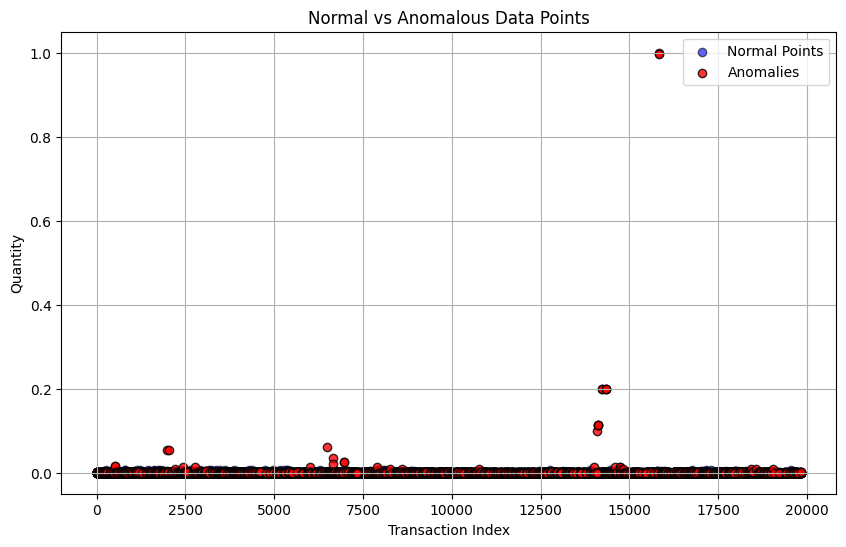

In [ ]:
# Split data into normal and anomalous points
normal_points = data[data['Outlier_Label'] == 1]
anomalies = data[data['Outlier_Label'] == -1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(normal_points.index, normal_points['Quantity'], c='blue', label='Normal Points', alpha=0.6, edgecolor='k')
plt.scatter(anomalies.index, anomalies['Quantity'], c='red', label='Anomalies', alpha=0.8, edgecolor='k')

# Plot details
plt.title('Normal vs Anomalous Data Points')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Count anomalies and normal points
num_anomalies = (data['Outlier_Label'] == -1).sum()
num_normal = (data['Outlier_Label'] == 1).sum()

print(f"Number of anomalies detected: {num_anomalies}")
print(f"Number of normal points: {num_normal}")

# Display top anomalies with the lowest LOF scores
top_anomalies = data[data['Outlier_Label'] == -1].sort_values(by='LOF_Score')
print("Top anomalies based on LOF Score:")
print(top_anomalies[['Quantity', 'LOF_Score']].head())


Number of anomalies detected: 991
Number of normal points: 18845
Top anomalies based on LOF Score:
       Quantity     LOF_Score
423    0.001618 -7.944585e+06
422    0.001618 -7.944585e+06
11704  0.001616 -7.549267e+06
5416   0.001608 -7.017897e+06
473    0.001349 -4.426078e+06


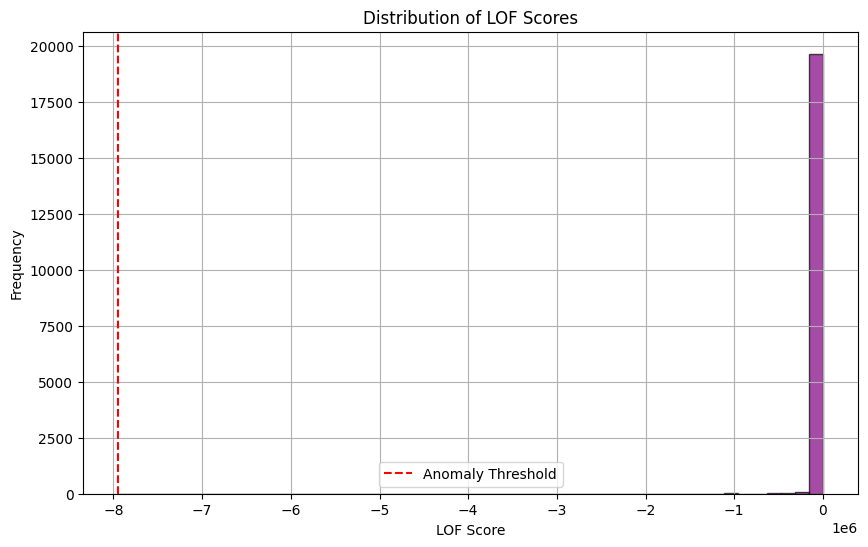

In [ ]:
# Histogram of LOF Scores
plt.figure(figsize=(10, 6))
plt.hist(data['LOF_Score'], bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribution of LOF Scores')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.axvline(x=min(data['LOF_Score']), color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Save the DataFrame as a Pickle file
data.to_pickle("LOF_model.pkl")

print("Pickle file saved as LOF_model.pkl")


Pickle file saved as LOF_model.pkl
